## Customer Churn Prediction Using Machine Learning
url:https://www.kaggle.com/c/customer-churn-prediction-2020/data

## Business Question

How earlier can we predict our customers who are more likely to churn?

## Data Question

1.Based on the historical customer data trying various machine learning algorithms which model could give us the highest accuracy on predicting  the customers who are more likely to quit the subscription?

2.What are the underlying  factors which influences the customers to churn?

## INPUT VARIABLES

state  -   US state of customer residence

account_length -  Number of months the customer has been with the current telco provider

area_code  - area_code_AAA" where AAA = 3 digit area code.

international_plan - The customer has the  international plan.

voice_mail_plan - The customer has voice mail plan.

number_vmail_messages -  Number of voice-mail messages.

total_day_minutes - Total minutes of day calls.

total_day_calls - Total minutes of day calls.

total_day_charge - Total charge of day calls.

total_eve_minutes - Total minutes of evening calls.

total_eve_calls - Total number of evening calls.

total_eve_charge - Total charge of evening calls.

total_night_minutes - Total minutes of night calls.

total_night_calls - Total number of night calls.

total_night_charge - Total charge of night calls.

total_intl_minutes - Total minutes of international calls.

total_intl_calls - Total number of international calls.

total_intl_charge - Total charge of international calls

number_customer_service_calls -  Number of calls to customer service


## OUTPUT VARIABLE

### churn - (Yes/No)

**Importing the necessary libraries**

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [123]:
C_train=pd.read_csv("train-2.csv")

In [124]:
C_train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [125]:
C_train.shape# The dataset has 4250 rows and 20 columns

(4250, 20)

In [126]:
# There are 3652 of non churners and 598 churners
C_train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [127]:
#no null values in the dataset
C_train.isnull().sum()


state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [128]:
#First 5 records of the dataset
C_train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

### Renaming the column name

In [129]:
#List of column names in the dataset
C_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [130]:
# Function written for displaying the information of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    print("\nDatatypes of the variables:")
    print(df.dtypes)

In [131]:
dataoveriew(C_train, 'Overiew of the dataset')

Overiew of the dataset:

Rows: 4250

Number of features: 20

Features:
['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']

Missing values: 0

Unique values:
state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
to

## 2. Exploratory Data Analysis

In [132]:
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go # visualization
trace = go.Pie(labels = C_train["churn"].value_counts().keys().tolist(),
               values = C_train["churn"].value_counts().values.tolist(),
               marker = dict(colors = ['LightSkyBlue','MediumPurple'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in whole dataset",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Quick data Profile

In [133]:
#pandas_profiling.ProfileReport(data_df.reset_index(), check_correlation=False)
#import pandas_profiling
#profile=pandas_profiling.ProfileReport(C_train)
#profile


In [134]:
C_train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [135]:
C_train.shape

(4250, 20)

## Exploratory Data Analysis

### BoxPlot

In [136]:
#numerical columns
num_var = C_train.columns.difference(['state','area_code','international_plan','voice_mail_plan', 'churn'])
num_var

Index(['account_length', 'number_customer_service_calls',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_day_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_charge',
       'total_intl_minutes', 'total_night_calls', 'total_night_charge',
       'total_night_minutes'],
      dtype='object')

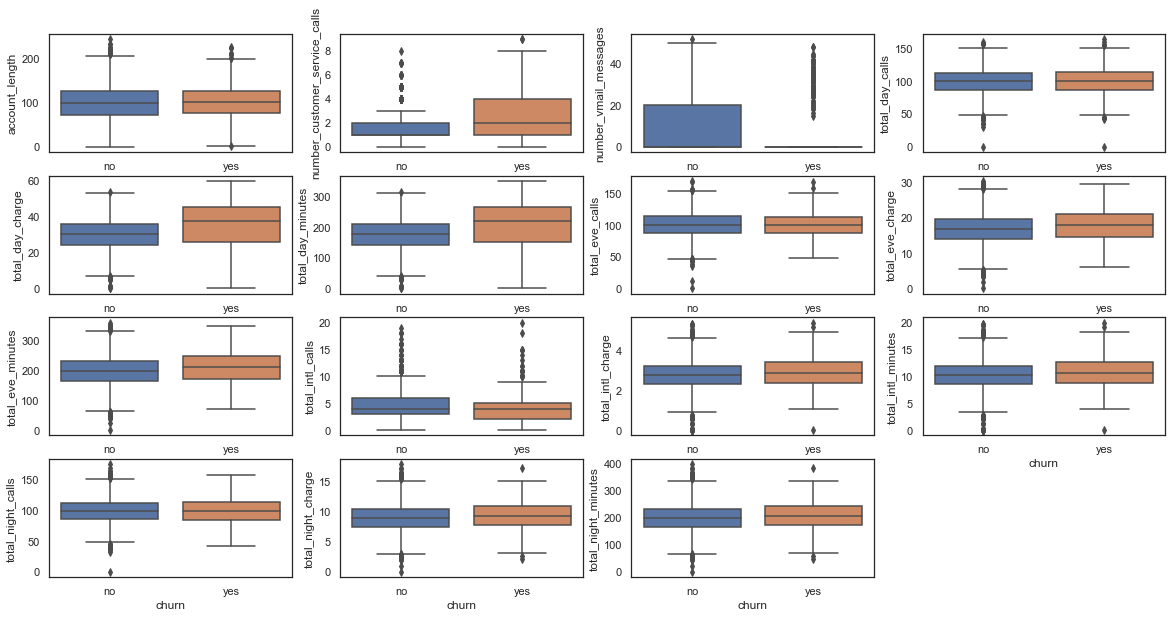

In [137]:
# we can see the visibility of the outliers in each  variable.
plt.figure(figsize=(20,10))
for i, c in enumerate(num_var):
    plt.subplot(4,4, i+1)
    sns.boxplot(x='churn', y=c, data=C_train)
plt.show()

###  Removing Outliers

Look at the upper extreme,lower extreme,inter quartile range ie.uper quartile and the lower quartile.
We are observing otliers in all the variables with churning and non churning customers.In this project we are not going to take the outliers but if in future required the code is given below to getrid of outliers and the other  process take in place automatically running t he code below.
There are three ways to detect the illegitimate outlier they are
1.using scatter plots,2.using Z score & 3.using the IQR interquartile range

#### Account Length

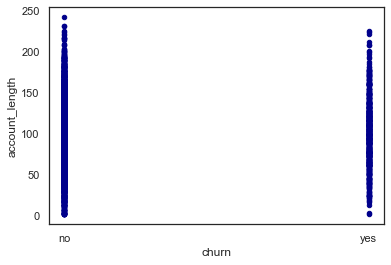

In [138]:
df =C_train.copy()#making a copy of C_train
df.plot.scatter(x='churn',y='account_length',c='DarkBlue')                                        

In [18]:
#Using the IQR interquartile range

Q1 = df.account_length.quantile(0.25)
Q3 = df.account_length.quantile(0.75)
Q1, Q3

(73.0, 127.0)

In [19]:
IQR = Q3 - Q1
IQR

54.0

In [20]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-8.0, 208.0)

In [21]:
df[(df.account_length<lower_limit)|(df.account_length>upper_limit)]

state  account_length      area_code international_plan voice_mail_plan  \
197     WY             215  area_code_510                 no              no   
256     SD             209  area_code_415                 no              no   
343     DE             224  area_code_510                yes              no   
684     UT             243  area_code_510                 no              no   
877     TX             217  area_code_408                 no              no   
1193    NM             232  area_code_408                 no              no   
1304    MI             225  area_code_415                 no              no   
1472    WY             225  area_code_415                 no              no   
1593    ID             224  area_code_510                 no              no   
1828    SC             212  area_code_415                 no              no   
1923    NC             210  area_code_415                 no             yes   
1939    DC             217  area_code_415                 no              no   
2289    SC             209  area_code_510                 no              no   
2725    SD             221  area_code_510                 no             yes   
2736    NY             209  area_code_415                 no              no   
3679    MI             216  area_code_408                 no              no   
3711    TN             222  area_code_408                 no             yes   
3719    HI             232  area_code_415                 no              no   
3932    VT             217  area_code_510                 no              no   
4079    TN             222  area_code_415                 no              no   

      number_vmail_messages  total_day_minutes  total_day_calls  \
197                       0               83.6              148   
256                       0              227.2              128   
343                       0              171.5               99   
684                       0               95.5               92   
877                       0              176.4              115   
1193                      0              165.6              104   
1304                      0              165.4              106   
1472                      0              182.7              142   
1593                      0              111.4              133   
1828                      0              226.0              127   
1923                     31              313.8               87   
1939                      0              123.7              138   
2289                      0              255.1              124   
2725                     24              180.5               85   
2736                      0              153.7              105   
3679                      0              212.3              106   
3711                     34              218.5               89   
3719                      0              248.2              128   
3932                      0               99.7               74   
4079                      0              256.6              119   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
197              14.21              120.9               91             10.28   
256              38.62              258.4               92             21.96   
343              29.16              160.0              103             13.60   
684              16.24              163.7               63             13.91   
877              29.99              158.8              128             13.50   
1193             28.15              195.9              115             16.65   
1304             28.12              273.7              109             23.26   
1472             31.06              246.5               63             20.95   
1593             18.94              175.0               66             14.88   
1828             38.42              304.6               83             25.89   
1923             53.35              

In [22]:
df_no_outlier = df[((df.account_length<lower_limit)>lower_limit)&((df.account_length<lower_limit)<upper_limit)]
df_no_outlier

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

In [23]:
df_no_outlier.shape

(4250, 20)

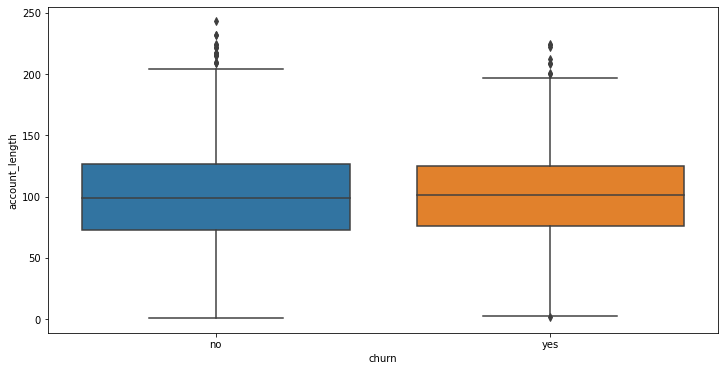

In [24]:
plt.rcParams['figure.figsize']=12,6
sns.boxplot(x="churn", y='account_length', data=df_no_outlier)   

In [25]:
num_var

Index(['account_length', 'number_customer_service_calls',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_day_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_charge',
       'total_intl_minutes', 'total_night_calls', 'total_night_charge',
       'total_night_minutes'],
      dtype='object')

Q1: 1.0
Q3:  2.0
Upper Extreme: 3.5
Lower Extreme: -0.5
IQR: 1.0
Shape (4250, 20)


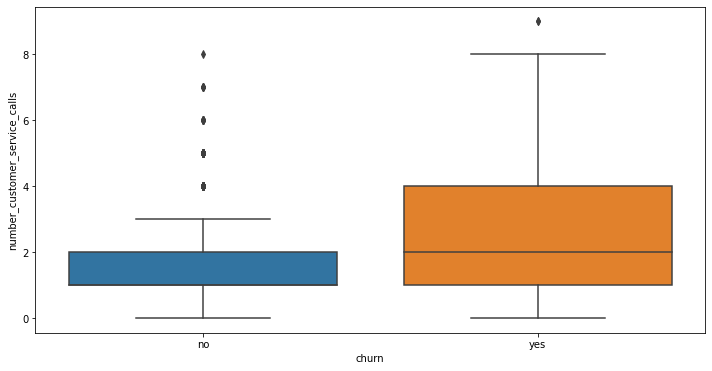

In [26]:
Q1 = df.number_customer_service_calls.quantile(0.25)
Q3 = df.number_customer_service_calls.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_no_outlier = df[((df.number_customer_service_calls<lower_limit)>lower_limit)&((df.number_customer_service_calls<lower_limit)<upper_limit)]
print("Q1:",Q1)
print("Q3: ",Q3)
print("Upper Extreme:",upper_limit)
print("Lower Extreme:",lower_limit)
print("IQR:",IQR)
print("Shape",df.shape)
plt.rcParams['figure.figsize']=12,6
sns.boxplot(x="churn", y='number_customer_service_calls', data=df_no_outlier)   

In [27]:
#Description of the data
C_train.describe().T

count        mean        std  min       25%  \
account_length                 4250.0  100.236235  39.698401  1.0   73.0000   
number_vmail_messages          4250.0    7.631765  13.439882  0.0    0.0000   
total_day_minutes              4250.0  180.259600  54.012373  0.0  143.3250   
total_day_calls                4250.0   99.907294  19.850817  0.0   87.0000   
total_day_charge               4250.0   30.644682   9.182096  0.0   24.3650   
total_eve_minutes              4250.0  200.173906  50.249518  0.0  165.9250   
total_eve_calls                4250.0  100.176471  19.908591  0.0   87.0000   
total_eve_charge               4250.0   17.015012   4.271212  0.0   14.1025   
total_night_minutes            4250.0  200.527882  50.353548  0.0  167.2250   
total_night_calls              4250.0   99.839529  20.093220  0.0   86.0000   
total_night_charge             4250.0    9.023892   2.265922  0.0    7.5225   
total_intl_minutes             4250.0   10.256071   2.760102  0.0    8.5000   
total_intl_calls               4250.0    4.426353   2.463069  0.0    3.0000   
total_intl_charge              4250.0    2.769654   0.745204  0.0    2.3000   
number_customer_service_calls  4250.0    1.559059   1.311434  0.0    1.0000   

                                  50%       75%     max  
account_length                 100.00  127.0000  243.00  
number_vmail_messages            0.00   16.0000   52.00  
total_day_minutes              180.45  216.2000  351.50  
total_day_calls                100.00  113.0000  165.00  
total_day_charge                30.68   36.7500   59.76  
total_eve_minutes              200.70  233.7750  359.30  
total_eve_calls                100.00  114.0000  170.00  
total_eve_charge                17.06   19.8675   30.54  
total_night_minutes            200.45  234.7000  395.00  
total_night_calls              100.00  113.0000  175.00  
total_night_charge               9.02   10.5600   17.77  
total_intl_minutes              10.30   12.0000   20.00  
total_intl_calls                 4.00    6.0000   20.00  
total_intl_charge                2.78    3.2400    5.40  
number_customer_service_calls    1.00    2.0000    9.00

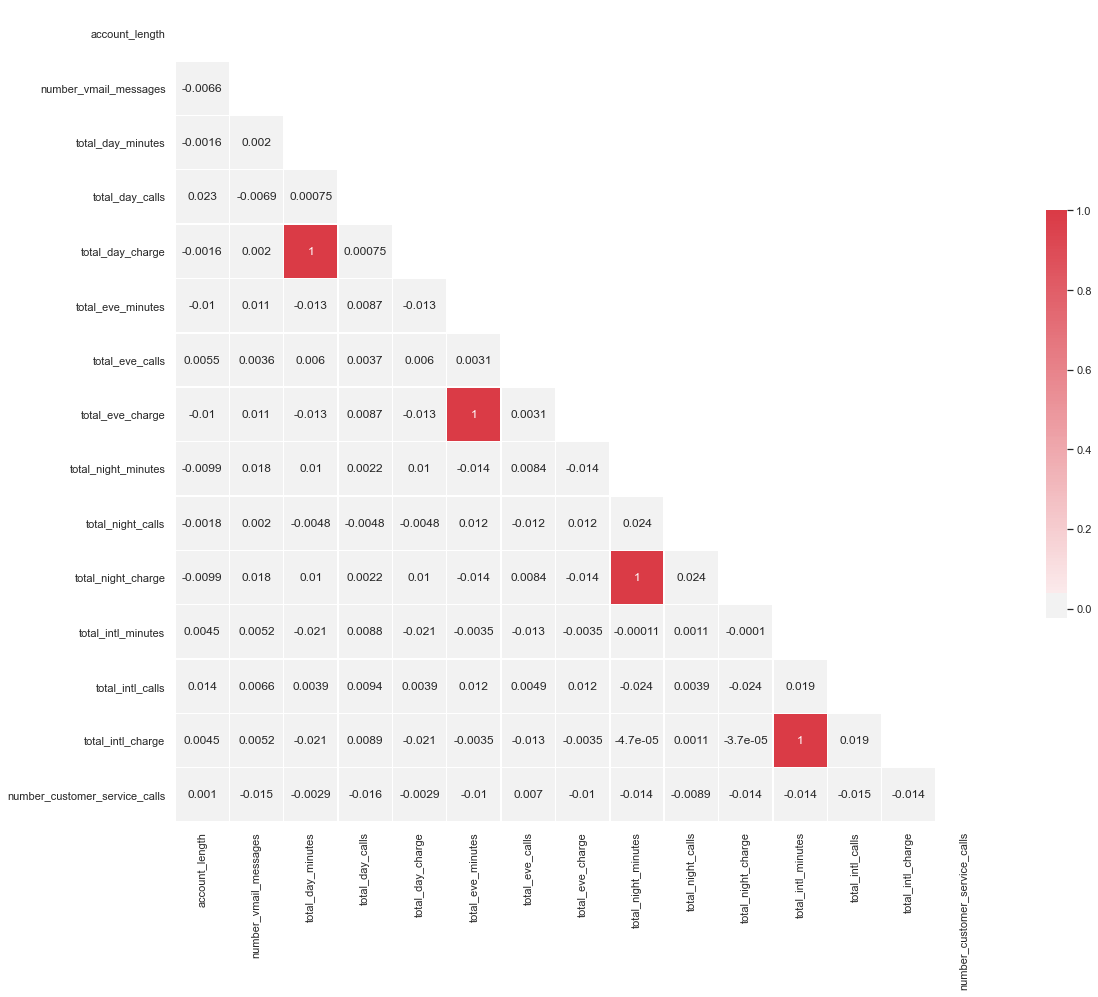

In [28]:

# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();


### We dont see much variables correlated to each other except (total_international minutes is highly correlated with total_int_charges, total_night_minutes with tatal_night_charge,total_eve_minutes withtotal evening charge,total_day_minutes with total_day_charge).We can either exclude the highy correlated variable or keep thse for futher proccess.

## Transforming Data

### Normalize Numeric Columns

In [29]:
C_train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [139]:
# Create Dummy Variables separately for state and area code
#st_area = pd.get_dummies(C_train, columns=['state', 'area_code'])
state_dum = pd.get_dummies(C_train['state'])
area_dum = pd.get_dummies(C_train['area_code'])

In [140]:
#Dummy variable for state
state_dum.head()

AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  WA  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   WI  WV  WY  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 51 columns]

In [141]:
#Dummy vaiable for area_code
area_dum.head()

area_code_408  area_code_415  area_code_510
0              0              1              0
1              0              1              0
2              1              0              0
3              0              1              0
4              0              0              1

### Preproccessing Numeric data

In [142]:
#Numeric input features
numeric = C_train[['account_length','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(numeric)
# transform training data
normal_numeric_data = norm.transform(numeric)
cols = numeric.columns.values
# normalized data to dataframe
normal_numeric_data = pd.DataFrame(data = normal_numeric_data, columns = cols)
normal_numeric_data.head(5)

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0        0.438017               0.500000           0.459744         0.745455   
1        0.561983               0.000000           0.692461         0.690909   
2        0.342975               0.000000           0.851778         0.430303   
3        0.305785               0.000000           0.474253         0.684848   
4        0.495868               0.461538           0.620768         0.533333   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0          0.459672           0.544114         0.605882          0.544204   
1          0.692436           0.337323         0.647059          0.337263   
2          0.851740           0.172279         0.517647          0.172233   
3          0.474230           0.412747         0.717647          0.412901   
4          0.620649           0.969942         0.635294          0.969876   

   total_night_minutes  total_night_calls  total_night_charge  \
0             0.644051           0.588571            0.644344   
1             0.411646           0.594286            0.411930   
2             0.498481           0.508571            0.498593   
3             0.473165           0.691429            0.473270   
4             0.538228           0.674286            0.538548   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0               0.685              0.15           0.685185   
1               0.610              0.25           0.609259   
2               0.330              0.35           0.329630   
3               0.505              0.15           0.505556   
4               0.375              0.35           0.375926   

   number_customer_service_calls  
0                       0.111111  
1                       0.000000  
2                       0.222222  
3                       0.333333  
4                       0.333333

### Standardizing Categorical data

In [143]:
# label encoding because it has a binary class response(yes/no) in categorical feature
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Categorical = C_train[['international_plan','voice_mail_plan','churn']]
Categorical = Categorical.apply(LabelEncoder().fit_transform)
Categorical.head(5)

international_plan  voice_mail_plan  churn
0                   0                1      0
1                   0                0      0
2                   1                0      0
3                   1                0      0
4                   0                1      0

In [144]:
#Concatenating  numeriacal & categorical into a final dataframe
Final_df =  pd.concat([state_dum,area_dum,normal_numeric_data, Categorical], axis=1)
Final_df.head()

AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  total_night_minutes  \
0   0   0   0   0   0   0   0   0   0   0  ...             0.644051   
1   0   0   0   0   0   0   0   0   0   0  ...             0.411646   
2   0   0   0   0   0   0   0   0   0   0  ...             0.498481   
3   0   0   0   0   0   0   0   0   0   0  ...             0.473165   
4   0   0   0   0   0   0   0   0   0   0  ...             0.538228   

   total_night_calls  total_night_charge  total_intl_minutes  \
0           0.588571            0.644344               0.685   
1           0.594286            0.411930               0.610   
2           0.508571            0.498593               0.330   
3           0.691429            0.473270               0.505   
4           0.674286            0.538548               0.375   

   total_intl_calls  total_intl_charge  number_customer_service_calls  \
0              0.15           0.685185                       0.111111   
1              0.25           0.609259                       0.000000   
2              0.35           0.329630                       0.222222   
3              0.15           0.505556                       0.333333   
4              0.35           0.375926                       0.333333   

   international_plan  voice_mail_plan  churn  
0                   0                1      0  
1                   0                0      0  
2                   1                0      0  
3                   1                0      0  
4                   0                1      0  

[5 rows x 72 columns]

In [145]:
# There are 72 columns in final dataframe
Final_df.shape

(4250, 72)

In [146]:
#List of columns in final dataset
Final_df.columns

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY', 'area_code_408', 'area_code_415', 'area_code_510',
       'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'international_plan',
       'voice_mail_plan', 'churn'],
      dtype='object')

## SMOTE - Synthetic Minority Over-sampling Technique
Oversampling teqniques usally used for the datasets which are imbalance(86% non_churners and 14% Churners).

In [147]:
# dropping churn for variable X  & Only churn for variable y(Target variable)
X=Final_df.drop('churn',axis=1)
y=Final_df['churn']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 42,stratify=y)
#We are applying th esomote technique to only for traininh set
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_Smote, y_train_Smote= sm.fit_resample(X_train, y_train)

In [148]:
#We can observe the increment in the data points afeter the smote
X_train_Smote.shape,y_train_Smote.shape

((5478, 71), (5478,))

In [149]:
#Its a orginal training data which has 3187 rows and 71 columns
X_train.shape,y_train.shape

((3187, 71), (3187,))

In [150]:
# y_train which has 2739 of non_churners and 448 of churners instances
y_train.value_counts()

0    2739
1     448
Name: churn, dtype: int64

In [151]:
# y_train with smote which has 2739 of non_churners and 2739 of churners instances
y_train_Smote.value_counts()

1    2739
0    2739
Name: churn, dtype: int64

In [152]:
#we are going to do predictions on X_test data(1063 instance) and y_test data(1063 instances)
X_test.shape,y_test.shape

((1063, 71), (1063,))

## Baseline model Building

**Basemodel Build, Score & Comparision after hyperparameter Tunning through GridsearchCv**

In [153]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble.bagging import BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [154]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve,scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

I am not using synthetic data in this validation data!
Just like with our testing data, we want to validate our model using only real data. This means that we only want our SMOTE data in the training folds and not in the validation folds. 
This imbalenced-learn module will help us here for data handeling know as the pipeline module. Just include the SMOTE process and your model into the pipeline and the module will handle the rest. You can use either the Pipeline or make_pipeline function for this task.
**from imblearn.pipeline import make_pipeline
pipeline = make_pipeline(smt, clf)
evaluate_model(X_train, y_train, pipeline)**

### SMOTE Oversampling teqnique for imbalance dataset

In [155]:

X=Final_df.drop('churn',axis=1)
y=Final_df['churn']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42,stratify=y)
#Dataset is imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_Smote, y_train_Smote= sm.fit_resample(X_train, y_train)

In [156]:
X.shape,y.shape


((4250, 71), (4250,))

In [157]:
X_train_Smote.shape, y_train_Smote.shape

((5478, 71), (5478,))

In [158]:
X_test.shape

(1063, 71)

In [159]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.metrics import roc_curve, auc
def evaluate_model(X_train, y_train, model):
    #X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 42,stratify=y)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, y_test)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    #print(f"Confusion Matrix: {confusion_matrix(y_test, preds)}")
    print(f"Report: {classification_report(y_test, preds)}")
    print(f"Accuracy Score: {accuracy_score(y_test, preds)}")
    
    #Cofusion Matrix
    cf_matrix = confusion_matrix(y_test, preds)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    
    
    #Plot ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    fig = px.area(x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate(1-Specificity)', y='True Positive Rate(Sensitivity)'),
    width=700, height=500
    
       )
    fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
     )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

## 1.SVM

Training Score:0.8594289300282397
Cross V Score: 0.8591152260093695 +/- 0.0004161163122029976
Testing Score: 0.8588899341486359
Cross & Test Diff: 0.00022529186073361185
Standard Deviations Away: 0.5414155949351627
Report:               precision    recall  f1-score   support

           0       0.86      1.00      0.92       913
           1       0.00      0.00      0.00       150

    accuracy                           0.86      1063
   macro avg       0.43      0.50      0.46      1063
weighted avg       0.74      0.86      0.79      1063

Accuracy Score: 0.8588899341486359


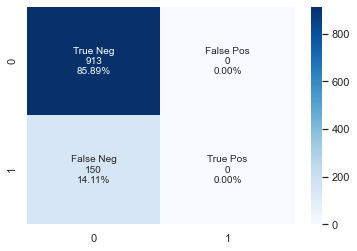

In [160]:
SVM = SVC(kernel = 'linear', random_state =42,probability=True)
evaluate_model(X_train, y_train, SVM)

## 2.SVM SMOTE

Training Score:0.8355239138371668
Cross V Score: 0.8216502373128879 +/- 0.024937738388826933
Testing Score: 0.7845719661335842
Cross & Test Diff: 0.037078271179303735
Standard Deviations Away: 1.4868337537744092
Report:               precision    recall  f1-score   support

           0       0.93      0.81      0.87       913
           1       0.36      0.65      0.46       150

    accuracy                           0.78      1063
   macro avg       0.65      0.73      0.66      1063
weighted avg       0.85      0.78      0.81      1063

Accuracy Score: 0.7845719661335842


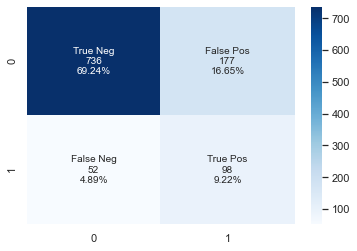

In [161]:
SVM_SMOTE = SVC(kernel = 'linear', random_state = 42,probability=True)
evaluate_model(X_train_Smote, y_train_Smote, SVM_SMOTE)

## 3.Logistic Regression

Training Score:0.8788829620332601
Cross V Score: 0.8707232193527775 +/- 0.009905693332690452
Testing Score: 0.8513640639698965
Cross & Test Diff: 0.01935915538288102
Standard Deviations Away: 1.95434632717657
Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.92       913
           1       0.45      0.23      0.31       150

    accuracy                           0.85      1063
   macro avg       0.67      0.59      0.61      1063
weighted avg       0.82      0.85      0.83      1063

Accuracy Score: 0.8513640639698965


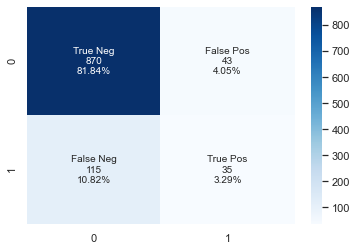

In [162]:
logmodel = LogisticRegression(C=5,random_state =42)
evaluate_model(X_train, y_train, logmodel)

## 4.Logistic Regression - SMOTE

Training Score:0.8435560423512231
Cross V Score: 0.826031398320555 +/- 0.027310359548416287
Testing Score: 0.7845719661335842
Cross & Test Diff: 0.0414594321869709
Standard Deviations Away: 1.5180844511940932
Report:               precision    recall  f1-score   support

           0       0.93      0.81      0.87       913
           1       0.35      0.61      0.45       150

    accuracy                           0.78      1063
   macro avg       0.64      0.71      0.66      1063
weighted avg       0.85      0.78      0.81      1063

Accuracy Score: 0.7845719661335842


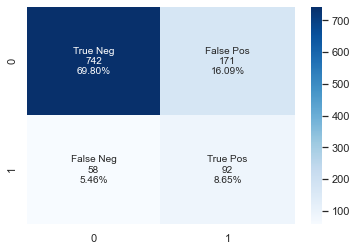

In [163]:
logmodel_SMOTE = LogisticRegression(C=5,random_state =42)
evaluate_model(X_train_Smote, y_train_Smote, logmodel_SMOTE)

## 5.GaussianNB

In [164]:
Gaussian = GaussianNB()

Training Score:0.6071540633824913
Cross V Score: 0.4669222533437978 +/- 0.08585181776554646
Testing Score: 0.5569143932267169
Cross & Test Diff: -0.0899921398829191
Standard Deviations Away: -1.0482263768564515
Report:               precision    recall  f1-score   support

           0       0.91      0.54      0.68       913
           1       0.19      0.67      0.30       150

    accuracy                           0.56      1063
   macro avg       0.55      0.61      0.49      1063
weighted avg       0.81      0.56      0.62      1063

Accuracy Score: 0.5569143932267169


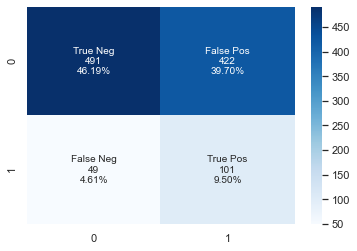

In [165]:
evaluate_model(X_train, y_train,Gaussian)

## 6.Gaussian_SMOTE

Training Score:0.6805403431909456
Cross V Score: 0.6604600219058051 +/- 0.05108680779854913
Testing Score: 0.48071495766698025
Cross & Test Diff: 0.17974506423882486
Standard Deviations Away: 3.5184242661552565
Report:               precision    recall  f1-score   support

           0       0.91      0.44      0.59       913
           1       0.18      0.73      0.28       150

    accuracy                           0.48      1063
   macro avg       0.54      0.58      0.44      1063
weighted avg       0.80      0.48      0.55      1063

Accuracy Score: 0.48071495766698025


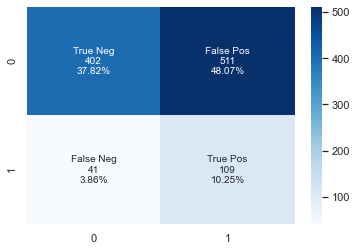

In [166]:
Gaussian_SMOTE = GaussianNB()
evaluate_model(X_train_Smote, y_train_Smote,Gaussian_SMOTE)

## 7.DecisionTreeClassifier

Training Score:1.0
Cross V Score: 0.9143403731872568 +/- 0.007561829461641054
Testing Score: 0.9012229539040452
Cross & Test Diff: 0.01311741928321164
Standard Deviations Away: 1.7346885895473396
Report:               precision    recall  f1-score   support

           0       0.95      0.94      0.94       913
           1       0.64      0.67      0.66       150

    accuracy                           0.90      1063
   macro avg       0.79      0.81      0.80      1063
weighted avg       0.90      0.90      0.90      1063

Accuracy Score: 0.9012229539040452


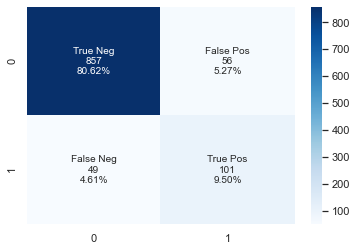

In [167]:
dt = DecisionTreeClassifier(random_state =42)
evaluate_model(X_train,y_train,dt)

## 8. DecisionTree - SMOTE

Training Score:1.0
Cross V Score: 0.8985031033223804 +/- 0.003750025298315816
Testing Score: 0.8692380056444027
Cross & Test Diff: 0.02926509767797769
Standard Deviations Away: 7.803973400158398
Report:               precision    recall  f1-score   support

           0       0.95      0.89      0.92       913
           1       0.53      0.73      0.61       150

    accuracy                           0.87      1063
   macro avg       0.74      0.81      0.77      1063
weighted avg       0.89      0.87      0.88      1063

Accuracy Score: 0.8692380056444027


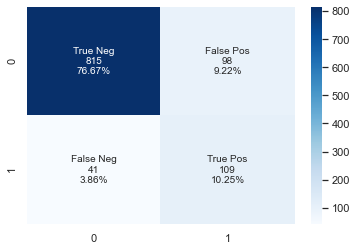

In [168]:
dt_SMOTE = DecisionTreeClassifier(random_state =42)
evaluate_model(X_train_Smote,y_train_Smote,dt_SMOTE)

## 9. RandomForestClassifier

Training Score:1.0
Cross V Score: 0.9341070027088172 +/- 0.0007939124856888802
Testing Score: 0.9482596425211665
Cross & Test Diff: -0.014152639812349266
Standard Deviations Away: -17.826448213708314
Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       913
           1       1.00      0.63      0.78       150

    accuracy                           0.95      1063
   macro avg       0.97      0.82      0.87      1063
weighted avg       0.95      0.95      0.94      1063

Accuracy Score: 0.9482596425211665


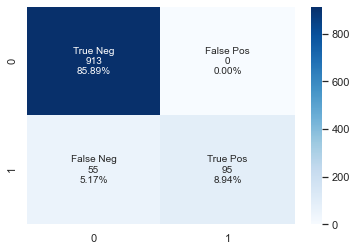

In [169]:
RFC = RandomForestClassifier(random_state =42)
evaluate_model(X_train,y_train,RFC)

## 10.RandomForest - SMOTE

Training Score:1.0
Cross V Score: 0.9344651332603139 +/- 0.005240124167363049
Testing Score: 0.9397930385700847
Cross & Test Diff: -0.005327905309770786
Standard Deviations Away: -1.016751729463676
Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       913
           1       0.80      0.77      0.78       150

    accuracy                           0.94      1063
   macro avg       0.88      0.87      0.87      1063
weighted avg       0.94      0.94      0.94      1063

Accuracy Score: 0.9397930385700847


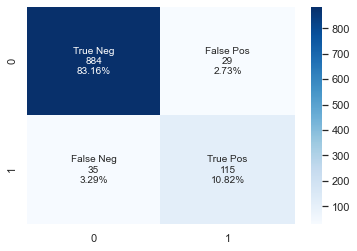

In [170]:
RFC_SMOTE = RandomForestClassifier(random_state =42)
evaluate_model(X_train_Smote,y_train_Smote,RFC_SMOTE)

## 11. AdaBoost

Training Score:0.9077502353310323
Cross V Score: 0.8860985768522799 +/- 0.006722060428484116
Testing Score: 0.8842897460018815
Cross & Test Diff: 0.0018088308503984019
Standard Deviations Away: 0.2690887518258013
Report:               precision    recall  f1-score   support

           0       0.91      0.97      0.93       913
           1       0.65      0.39      0.49       150

    accuracy                           0.88      1063
   macro avg       0.78      0.68      0.71      1063
weighted avg       0.87      0.88      0.87      1063

Accuracy Score: 0.8842897460018815


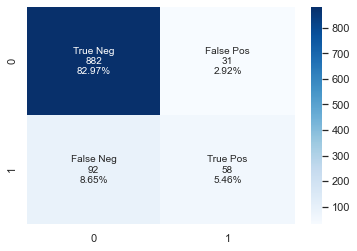

In [171]:

ADA = AdaBoostClassifier(random_state =42)
evaluate_model(X_train,y_train,ADA)

## 12.AdaBoost - SMOTE

Training Score:0.8893756845564075
Cross V Score: 0.872946330777656 +/- 0.02801032169232077
Testing Score: 0.8504233301975541
Cross & Test Diff: 0.022523000580101926
Standard Deviations Away: 0.8040964622793592
Report:               precision    recall  f1-score   support

           0       0.94      0.89      0.91       913
           1       0.48      0.63      0.54       150

    accuracy                           0.85      1063
   macro avg       0.71      0.76      0.73      1063
weighted avg       0.87      0.85      0.86      1063

Accuracy Score: 0.8504233301975541


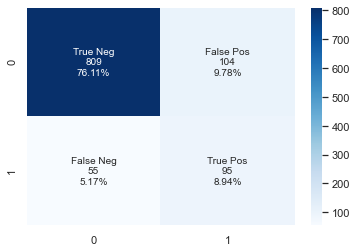

In [172]:
ADA_SMOTE = AdaBoostClassifier(random_state =42)
evaluate_model(X_train_Smote,y_train_Smote,ADA_SMOTE)

## 13. XGBOOST


Training Score:1.0
Cross V Score: 0.9526184347205761 +/- 0.0058329619074382975
Testing Score: 0.9567262464722484
Cross & Test Diff: -0.004107811751672297
Standard Deviations Away: -0.7042411414403276
Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       913
           1       0.92      0.76      0.83       150

    accuracy                           0.96      1063
   macro avg       0.94      0.87      0.90      1063
weighted avg       0.96      0.96      0.95      1063

Accuracy Score: 0.9567262464722484


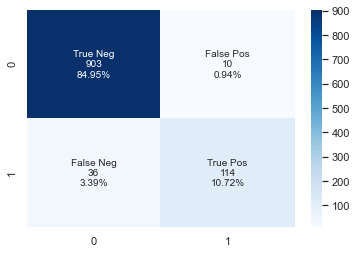

In [173]:
gbm = xgb.XGBClassifier(random_state =42)
evaluate_model(X_train,y_train,gbm)

## 14.XGBOOST with SMOTE

Training Score:1.0
Cross V Score: 0.9518072289156626 +/- 0.03486339439823862
Testing Score: 0.9567262464722484
Cross & Test Diff: -0.0049190175565857475
Standard Deviations Away: -0.14109405126754576
Report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       913
           1       0.89      0.79      0.84       150

    accuracy                           0.96      1063
   macro avg       0.93      0.89      0.91      1063
weighted avg       0.96      0.96      0.96      1063

Accuracy Score: 0.9567262464722484


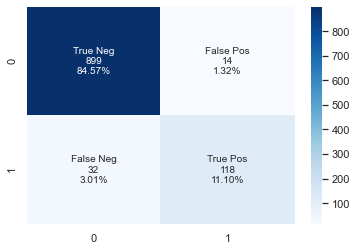

In [174]:

gbm_SMOTE = xgb.XGBClassifier(random_state =42)
evaluate_model(X_train_Smote,y_train_Smote,gbm_SMOTE)

## 15. XGBOOST with random parameters.

In [175]:
gbm_ran = xgb.XGBClassifier(learning_rate = 0.02,random_state =42,
    n_estimators = 100,
    max_depth = 4,
    min_child_weight = 2,
    gamma = 0.9,                        
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'binary:logistic',
    nthread = -1,
    scale_pos_weight = 1)

Training Score:0.9610919359899592
Cross V Score: 0.9491664201152856 +/- 0.0068469041421736565
Testing Score: 0.949200376293509
Cross & Test Diff: -3.395617822332664e-05
Standard Deviations Away: -0.004959347687398282
Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       913
           1       0.98      0.65      0.78       150

    accuracy                           0.95      1063
   macro avg       0.96      0.83      0.88      1063
weighted avg       0.95      0.95      0.94      1063

Accuracy Score: 0.949200376293509


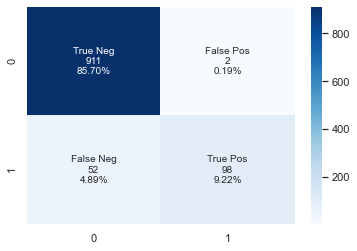

In [176]:
evaluate_model(X_train, y_train,gbm_ran )

## 16.XGBOOST_Smote with random parameters


Training Score:0.9916027747353049
Cross V Score: 0.9466958744067178 +/- 0.045972480655711724
Testing Score: 0.9576669802445907
Cross & Test Diff: -0.010971105837872974
Standard Deviations Away: -0.2386450694282885
Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       913
           1       0.92      0.77      0.84       150

    accuracy                           0.96      1063
   macro avg       0.94      0.88      0.91      1063
weighted avg       0.96      0.96      0.96      1063

Accuracy Score: 0.9576669802445907


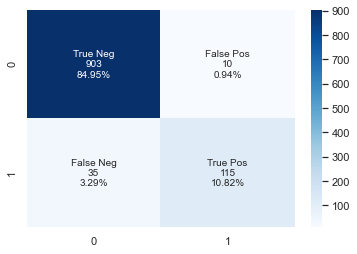

In [177]:
gbm_ran_SMOTE = xgb.XGBClassifier(learning_rate = 0.02,random_state =42,
    n_estimators = 2000,
    max_depth = 4,
    min_child_weight = 2,
    gamma = 0.9,                        
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'binary:logistic',
    nthread = -1,
    scale_pos_weight = 1)
evaluate_model(X_train_Smote,y_train_Smote,gbm_ran_SMOTE)

## Hyperparameter Tuning for all the models using GridsearchCV

**Defing the model parameters**

In [178]:
model_params = {
    'svm': {
        'Model': SVC(gamma='auto'),
        'params' : {
            'C': [1, 10, 100, 1000],
            'kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'Model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
            
        }
    },
    'naive_bayes_gaussian': {
        'Model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'Model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
            
        }
     },
    'Adaboost': {
        'Model': AdaBoostClassifier(),
        'params': {
            'learning_rate': [0.1, 0.01, 0.05],
            'n_estimators': [100,200, 600]
            
        }
    },
    'randomforrest': {
        'Model': RandomForestClassifier(random_state = 1),
        'params': {
            #'bootstrap': [True, False],
            'max_depth': [10, 20, 30],
            #'max_features': ['auto', 'sqrt'],
            #'min_samples_leaf': [1, 2, 4],
            #'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 600]
         
        }
     },
}

In [179]:
# Evaluate Optimized Model
gbm_GridSearch = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0.25,
                        learn_rate=0.1,
                        min_child_weight = 2,
                        max_depth=4,
                        reg_lambda=10.0,
                        scale_pos_weight=1,
                        subsample=0.9,
                        nthread = -1,
                        colsample_bytree=0.8)
gbm_GridSearch.fit(X_train,y_train, 
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])



[13:25:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84261
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.85797
[2]	validation_0-auc:0.88755
[3]	validation_0-auc:0.89318
[4]	validation_0-auc:0.89791
[5]	validation_0-auc:0.90511
[6]	validation_0-auc:0.90544
[7]	validation_0-auc:0.90206
[8]	validation_0-auc:0.90078
[9]	validation_0-auc:0.90082
[10]	validation_0-auc:0.90017
[11]	validation_0-auc:0.89950
[12]	validation_0-auc:0.89859
[13]	validation_0-auc:0.89780
[14]	validation_0-auc:0.90030
[15]	validation_0-auc:0.90065
[16]	validation_0-auc:0.89962
Stopping. Best iteration:
[6]	validation_0-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, random_state=42, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, seed=42, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 17.XGBoost with gridsearch CV

[13:25:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:25:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:25:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in langu

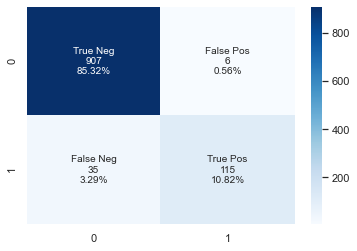

In [180]:
xgb_grid = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=2, 
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, random_state=42, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, seed=42, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)
evaluate_model(X_train, y_train, xgb_grid)

## 18.XGBoost with gridsearch CV-SMOTE

[13:25:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:25:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:25:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in langu

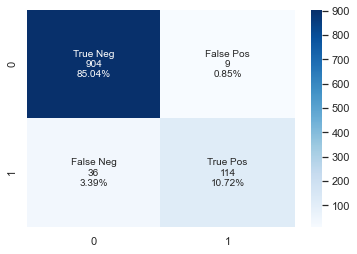

In [181]:
xgb_grid_SMOTE = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=2, 
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, random_state=42, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, seed=42, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

evaluate_model(X_train_Smote,y_train_Smote,xgb_grid_SMOTE)  

##  XGboost - Optuna 

Code taken from https://github.com/optuna/optuna/blob/master/examples/xgboost_simple.py
Optuna  that optimizes a classifier configuration for Churn Dataset
using XGBoost.
In this example, we optimize the test accuracy of churn prediction
using XGBoost. We optimize both the choice of booster model and their hyper
parameters.

## 19.XGBoost using Optuna

Training Score:0.9836837150925636
Cross V Score: 0.9541878006967218 +/- 0.003121972055252944
Testing Score: 0.9595484477892756
Cross & Test Diff: -0.005360647092553794
Standard Deviations Away: -1.7170708121919662
Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       913
           1       0.93      0.77      0.84       150

    accuracy                           0.96      1063
   macro avg       0.95      0.88      0.91      1063
weighted avg       0.96      0.96      0.96      1063

Accuracy Score: 0.9595484477892756


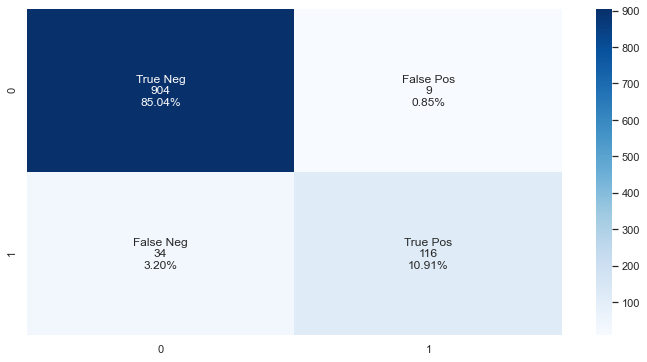

In [72]:

gbm_optuna = xgb.XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.02,
    random_state =42,
    booster = 'dart',
    reg_lambda = 0.000537188870140782,
    alpha = 4.183769589573285e-07,
    max_depth = 8,
    eta = 0.1041103115293149,
    gamma = 0.009723248119317662,
    grow_policy = 'lossguide')

evaluate_model(X_train, y_train, gbm_optuna)

## 20.XGBoost using optuna - SMOTE

Training Score:0.9985396129974443
Cross V Score: 0.9558232931726908 +/- 0.02227389418425651
Testing Score: 0.9539040451552211
Cross & Test Diff: 0.0019192480174696769
Standard Deviations Away: 0.08616580475749173
Report:               precision    recall  f1-score   support

           0       0.97      0.98      0.97       913
           1       0.87      0.79      0.83       150

    accuracy                           0.95      1063
   macro avg       0.92      0.89      0.90      1063
weighted avg       0.95      0.95      0.95      1063

Accuracy Score: 0.9539040451552211


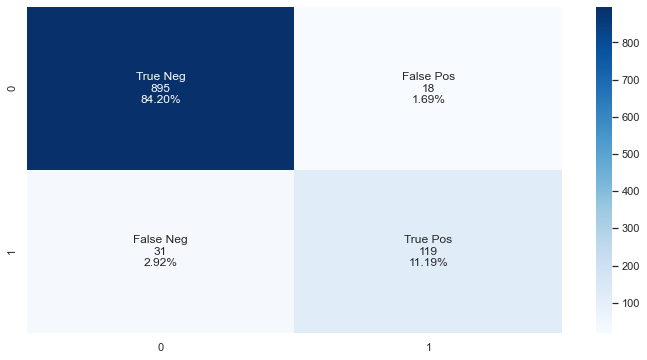

In [82]:
gbm_optuna_SMOTE = xgb.XGBClassifier(
    n_estimators = 630,
    learning_rate = 0.02,random_state =42,
    booster = 'dart',
    reg_lambda = 0.000537188870140782,
    alpha = 4.183769589573285e-07,
    max_depth = 8,
    eta = 0.1041103115293149,
    gamma = 0.009723248119317662,
    grow_policy = 'lossguide')

evaluate_model(X_train_Smote,y_train_Smote,gbm_optuna_SMOTE)

### Optimize hyperparameters of the model using Optuna with RandomForest 

The hyperparameters of the above algorithm are `n_estimators` and `max_depth` for which we can try different values to see if the model accuracy can be improved. The `objective` function is modified to accept a trial object. This trial has several methods for sampling hyperparameters. We create a study to run the hyperparameter optimization and finally read the best hyperparameters.

In [75]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC',])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100))
        #bootstrap = ('bootstrap',True, False)
        #max_feature = trial.suggest_int('max_features','auto', 'sqrt')
        #min_samples_leaf = trial.suggest_int('min_samples_leaf',1, 2, 4)
        #min_samples_split = trial.suggest_int('min_samples_split',2, 5, 10)
            
        clf = sklearn.ensemble.RandomForestClassifier(
              n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e100, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()



## 21.RandomForest - Optuna 

Training Score:1.0
Cross V Score: 0.940696272910824 +/- 0.0007913562248922901
Testing Score: 0.9510818438381938
Cross & Test Diff: -0.010385570927369803
Standard Deviations Away: -13.123762220715912
Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       913
           1       0.99      0.66      0.79       150

    accuracy                           0.95      1063
   macro avg       0.97      0.83      0.88      1063
weighted avg       0.95      0.95      0.95      1063

Accuracy Score: 0.9510818438381938


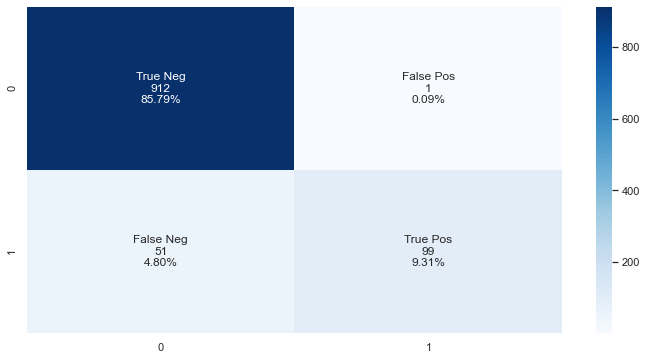

In [74]:
RFC_opt = RandomForestClassifier(n_estimators=630,max_depth = 48.857123929946525,random_state =42)
evaluate_model(X_train,y_train,RFC_opt)

## 22.RandomForest - Optuna-SMOTE

Training Score:1.0
Cross V Score: 0.936838262139467 +/- 0.006830334769576403
Testing Score: 0.9482596425211665
Cross & Test Diff: -0.011421380381699486
Standard Deviations Away: -1.6721552847705892
Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       913
           1       0.84      0.79      0.81       150

    accuracy                           0.95      1063
   macro avg       0.90      0.88      0.89      1063
weighted avg       0.95      0.95      0.95      1063

Accuracy Score: 0.9482596425211665


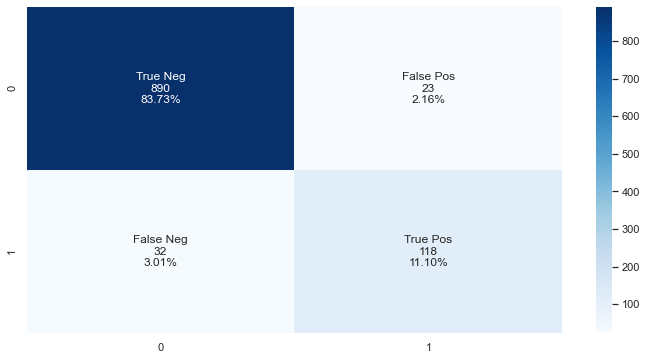

In [75]:
RFC_opt_SMOTE = RandomForestClassifier(n_estimators=630,max_depth = 48.857123929946525)
evaluate_model(X_train_Smote,y_train_Smote,RFC_opt_SMOTE)  

# Catboost is a gradient boosting library.




Gradient boosting works well with hetrogenouse data and gives best solution. 
Very easy to use relatively with small amount of data.It is an iterative algorithm.
Catboost - This algorithim supports categorical feature  without hyperparameter tuning and  gives us the good results.
we do not need to tune lot which saves more time.
Quality,speed in (training on cpu,gpu and also prediction speed)


## 23.CatBoostClassifier

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.0169
0:	learn: 0.6773818	total: 4.57ms	remaining: 4.57s
1:	learn: 0.6574818	total: 9.15ms	remaining: 4.57s
2:	learn: 0.6463191	total: 11.4ms	remaining: 3.79s
3:	learn: 0.6296048	total: 16ms	remaining: 3.99s
4:	learn: 0.6153819	total: 20.8ms	remaining: 4.13s
5:	learn: 0.6022667	total: 25.3ms	remaining: 4.2s
6:	learn: 0.5892902	total: 30.2ms	remaining: 4.28s
7:	learn: 0.5765804	total: 35ms	remaining: 4.34s
8:	learn: 0.5650728	total: 39.9ms	remaining: 4.39s
9:	learn: 0.5519057	total: 44.7ms	remaining: 4.43s
10:	learn: 0.5400911	total: 49.3ms	remaining: 4.43s
11:	learn: 0.5280835	total: 53.8ms	remaining: 4.43s
12:	learn: 0.5148092	total: 58.6ms	remaining: 4.45s
13:	learn: 0.5045136	total: 63.4ms	remaining: 4.47s
14:	learn: 0.4939231	total: 68.3ms	remaining: 4.48s
15:	learn: 0.4839564	total: 73.3ms	remaining: 4.51s
16:	learn: 0.4751055	total: 78ms	remaining: 4.51s
17:	learn: 0.4634526	total: 82.7ms	remaining: 4.51s
18:	learn: 0.4547272	total: 87.4ms	remaining: 4.51s
1

174:	learn: 0.1534430	total: 1.17s	remaining: 5.49s
175:	learn: 0.1531436	total: 1.17s	remaining: 5.5s
176:	learn: 0.1528541	total: 1.18s	remaining: 5.5s
177:	learn: 0.1525204	total: 1.19s	remaining: 5.5s
178:	learn: 0.1521042	total: 1.2s	remaining: 5.5s
179:	learn: 0.1516198	total: 1.21s	remaining: 5.5s
180:	learn: 0.1514103	total: 1.22s	remaining: 5.5s
181:	learn: 0.1509308	total: 1.22s	remaining: 5.49s
182:	learn: 0.1504987	total: 1.23s	remaining: 5.47s
183:	learn: 0.1500853	total: 1.23s	remaining: 5.46s
184:	learn: 0.1497601	total: 1.24s	remaining: 5.44s
185:	learn: 0.1495125	total: 1.24s	remaining: 5.43s
186:	learn: 0.1493518	total: 1.24s	remaining: 5.41s
187:	learn: 0.1490552	total: 1.25s	remaining: 5.39s
188:	learn: 0.1488204	total: 1.25s	remaining: 5.38s
189:	learn: 0.1484355	total: 1.26s	remaining: 5.37s
190:	learn: 0.1480588	total: 1.26s	remaining: 5.35s
191:	learn: 0.1477994	total: 1.27s	remaining: 5.33s
192:	learn: 0.1475168	total: 1.27s	remaining: 5.32s
193:	learn: 0.14720

350:	learn: 0.1191298	total: 2.14s	remaining: 3.95s
351:	learn: 0.1190003	total: 2.15s	remaining: 3.95s
352:	learn: 0.1188594	total: 2.15s	remaining: 3.95s
353:	learn: 0.1187606	total: 2.16s	remaining: 3.95s
354:	learn: 0.1186516	total: 2.17s	remaining: 3.94s
355:	learn: 0.1185767	total: 2.18s	remaining: 3.94s
356:	learn: 0.1185211	total: 2.18s	remaining: 3.93s
357:	learn: 0.1184031	total: 2.19s	remaining: 3.92s
358:	learn: 0.1182320	total: 2.19s	remaining: 3.92s
359:	learn: 0.1181715	total: 2.2s	remaining: 3.91s
360:	learn: 0.1180676	total: 2.2s	remaining: 3.9s
361:	learn: 0.1179594	total: 2.21s	remaining: 3.89s
362:	learn: 0.1177828	total: 2.21s	remaining: 3.88s
363:	learn: 0.1176450	total: 2.22s	remaining: 3.87s
364:	learn: 0.1176032	total: 2.22s	remaining: 3.87s
365:	learn: 0.1174654	total: 2.23s	remaining: 3.86s
366:	learn: 0.1174354	total: 2.23s	remaining: 3.85s
367:	learn: 0.1173579	total: 2.24s	remaining: 3.84s
368:	learn: 0.1172480	total: 2.24s	remaining: 3.84s
369:	learn: 0.1

527:	learn: 0.1021280	total: 3.09s	remaining: 2.76s
528:	learn: 0.1020704	total: 3.1s	remaining: 2.76s
529:	learn: 0.1019962	total: 3.11s	remaining: 2.76s
530:	learn: 0.1018647	total: 3.12s	remaining: 2.76s
531:	learn: 0.1018108	total: 3.13s	remaining: 2.75s
532:	learn: 0.1017908	total: 3.14s	remaining: 2.75s
533:	learn: 0.1017802	total: 3.14s	remaining: 2.74s
534:	learn: 0.1017085	total: 3.15s	remaining: 2.73s
535:	learn: 0.1016399	total: 3.15s	remaining: 2.73s
536:	learn: 0.1015594	total: 3.16s	remaining: 2.72s
537:	learn: 0.1014616	total: 3.16s	remaining: 2.71s
538:	learn: 0.1014086	total: 3.17s	remaining: 2.71s
539:	learn: 0.1013248	total: 3.17s	remaining: 2.7s
540:	learn: 0.1012956	total: 3.18s	remaining: 2.7s
541:	learn: 0.1011905	total: 3.18s	remaining: 2.69s
542:	learn: 0.1011492	total: 3.19s	remaining: 2.68s
543:	learn: 0.1011081	total: 3.19s	remaining: 2.67s
544:	learn: 0.1010976	total: 3.2s	remaining: 2.67s
545:	learn: 0.1010567	total: 3.2s	remaining: 2.66s
546:	learn: 0.101

704:	learn: 0.0892839	total: 4.05s	remaining: 1.69s
705:	learn: 0.0892465	total: 4.05s	remaining: 1.69s
706:	learn: 0.0892096	total: 4.06s	remaining: 1.68s
707:	learn: 0.0891146	total: 4.07s	remaining: 1.68s
708:	learn: 0.0890554	total: 4.08s	remaining: 1.67s
709:	learn: 0.0890148	total: 4.09s	remaining: 1.67s
710:	learn: 0.0890014	total: 4.1s	remaining: 1.67s
711:	learn: 0.0889640	total: 4.11s	remaining: 1.66s
712:	learn: 0.0889184	total: 4.12s	remaining: 1.66s
713:	learn: 0.0888640	total: 4.12s	remaining: 1.65s
714:	learn: 0.0888076	total: 4.13s	remaining: 1.65s
715:	learn: 0.0887886	total: 4.13s	remaining: 1.64s
716:	learn: 0.0887371	total: 4.14s	remaining: 1.63s
717:	learn: 0.0887251	total: 4.14s	remaining: 1.63s
718:	learn: 0.0887122	total: 4.15s	remaining: 1.62s
719:	learn: 0.0886922	total: 4.15s	remaining: 1.61s
720:	learn: 0.0886758	total: 4.16s	remaining: 1.61s
721:	learn: 0.0886084	total: 4.16s	remaining: 1.6s
722:	learn: 0.0885035	total: 4.17s	remaining: 1.59s
723:	learn: 0.

876:	learn: 0.0791813	total: 5s	remaining: 702ms
877:	learn: 0.0791032	total: 5.01s	remaining: 697ms
878:	learn: 0.0790237	total: 5.02s	remaining: 691ms
879:	learn: 0.0789248	total: 5.03s	remaining: 686ms
880:	learn: 0.0788388	total: 5.04s	remaining: 681ms
881:	learn: 0.0788286	total: 5.06s	remaining: 677ms
882:	learn: 0.0787289	total: 5.07s	remaining: 672ms
883:	learn: 0.0786937	total: 5.08s	remaining: 667ms
884:	learn: 0.0785632	total: 5.09s	remaining: 661ms
885:	learn: 0.0784629	total: 5.09s	remaining: 655ms
886:	learn: 0.0784141	total: 5.11s	remaining: 650ms
887:	learn: 0.0783765	total: 5.12s	remaining: 645ms
888:	learn: 0.0783506	total: 5.14s	remaining: 642ms
889:	learn: 0.0782724	total: 5.3s	remaining: 656ms
890:	learn: 0.0782302	total: 5.41s	remaining: 662ms
891:	learn: 0.0781156	total: 5.44s	remaining: 659ms
892:	learn: 0.0780713	total: 5.45s	remaining: 653ms
893:	learn: 0.0780617	total: 5.46s	remaining: 647ms
894:	learn: 0.0780146	total: 5.47s	remaining: 642ms
895:	learn: 0.07

59:	learn: 0.2915178	total: 409ms	remaining: 6.41s
60:	learn: 0.2889117	total: 430ms	remaining: 6.63s
61:	learn: 0.2858920	total: 437ms	remaining: 6.61s
62:	learn: 0.2831975	total: 443ms	remaining: 6.58s
63:	learn: 0.2806221	total: 449ms	remaining: 6.56s
64:	learn: 0.2784074	total: 455ms	remaining: 6.54s
65:	learn: 0.2755351	total: 461ms	remaining: 6.52s
66:	learn: 0.2737004	total: 467ms	remaining: 6.5s
67:	learn: 0.2721295	total: 472ms	remaining: 6.47s
68:	learn: 0.2699953	total: 477ms	remaining: 6.44s
69:	learn: 0.2677180	total: 483ms	remaining: 6.42s
70:	learn: 0.2657583	total: 490ms	remaining: 6.41s
71:	learn: 0.2638545	total: 495ms	remaining: 6.38s
72:	learn: 0.2623357	total: 502ms	remaining: 6.37s
73:	learn: 0.2604146	total: 508ms	remaining: 6.35s
74:	learn: 0.2586876	total: 513ms	remaining: 6.33s
75:	learn: 0.2563661	total: 519ms	remaining: 6.31s
76:	learn: 0.2544940	total: 525ms	remaining: 6.29s
77:	learn: 0.2527175	total: 531ms	remaining: 6.28s
78:	learn: 0.2509434	total: 537m

225:	learn: 0.1488204	total: 2.43s	remaining: 8.32s
226:	learn: 0.1484237	total: 2.44s	remaining: 8.3s
227:	learn: 0.1481605	total: 2.45s	remaining: 8.3s
228:	learn: 0.1480322	total: 2.46s	remaining: 8.28s
229:	learn: 0.1477956	total: 2.48s	remaining: 8.29s
230:	learn: 0.1475553	total: 2.48s	remaining: 8.28s
231:	learn: 0.1473261	total: 2.49s	remaining: 8.26s
232:	learn: 0.1470729	total: 2.5s	remaining: 8.24s
233:	learn: 0.1466191	total: 2.51s	remaining: 8.21s
234:	learn: 0.1463023	total: 2.51s	remaining: 8.18s
235:	learn: 0.1460660	total: 2.52s	remaining: 8.15s
236:	learn: 0.1457004	total: 2.52s	remaining: 8.12s
237:	learn: 0.1454602	total: 2.53s	remaining: 8.1s
238:	learn: 0.1452298	total: 2.54s	remaining: 8.07s
239:	learn: 0.1450060	total: 2.54s	remaining: 8.05s
240:	learn: 0.1447167	total: 2.55s	remaining: 8.02s
241:	learn: 0.1445283	total: 2.55s	remaining: 8s
242:	learn: 0.1443507	total: 2.56s	remaining: 7.98s
243:	learn: 0.1441927	total: 2.57s	remaining: 7.96s
244:	learn: 0.14403

409:	learn: 0.1149936	total: 3.38s	remaining: 4.86s
410:	learn: 0.1147621	total: 3.39s	remaining: 4.86s
411:	learn: 0.1146954	total: 3.4s	remaining: 4.85s
412:	learn: 0.1146330	total: 3.41s	remaining: 4.84s
413:	learn: 0.1144448	total: 3.42s	remaining: 4.84s
414:	learn: 0.1142726	total: 3.42s	remaining: 4.83s
415:	learn: 0.1141010	total: 3.43s	remaining: 4.82s
416:	learn: 0.1138968	total: 3.44s	remaining: 4.8s
417:	learn: 0.1136849	total: 3.44s	remaining: 4.79s
418:	learn: 0.1136093	total: 3.45s	remaining: 4.79s
419:	learn: 0.1133932	total: 3.46s	remaining: 4.77s
420:	learn: 0.1132675	total: 3.46s	remaining: 4.76s
421:	learn: 0.1131443	total: 3.47s	remaining: 4.75s
422:	learn: 0.1130394	total: 3.47s	remaining: 4.74s
423:	learn: 0.1129132	total: 3.48s	remaining: 4.73s
424:	learn: 0.1128076	total: 3.49s	remaining: 4.72s
425:	learn: 0.1126495	total: 3.49s	remaining: 4.71s
426:	learn: 0.1124871	total: 3.5s	remaining: 4.69s
427:	learn: 0.1123463	total: 3.5s	remaining: 4.68s
428:	learn: 0.11

604:	learn: 0.0949153	total: 4.33s	remaining: 2.82s
605:	learn: 0.0948292	total: 4.33s	remaining: 2.82s
606:	learn: 0.0948094	total: 4.34s	remaining: 2.81s
607:	learn: 0.0947597	total: 4.35s	remaining: 2.8s
608:	learn: 0.0946828	total: 4.35s	remaining: 2.79s
609:	learn: 0.0946485	total: 4.36s	remaining: 2.79s
610:	learn: 0.0944879	total: 4.37s	remaining: 2.78s
611:	learn: 0.0944299	total: 4.37s	remaining: 2.77s
612:	learn: 0.0942860	total: 4.38s	remaining: 2.76s
613:	learn: 0.0942342	total: 4.38s	remaining: 2.75s
614:	learn: 0.0942049	total: 4.38s	remaining: 2.74s
615:	learn: 0.0940881	total: 4.39s	remaining: 2.74s
616:	learn: 0.0940158	total: 4.39s	remaining: 2.73s
617:	learn: 0.0939807	total: 4.4s	remaining: 2.72s
618:	learn: 0.0938302	total: 4.4s	remaining: 2.71s
619:	learn: 0.0937503	total: 4.41s	remaining: 2.7s
620:	learn: 0.0936964	total: 4.41s	remaining: 2.69s
621:	learn: 0.0935574	total: 4.41s	remaining: 2.68s
622:	learn: 0.0934458	total: 4.42s	remaining: 2.67s
623:	learn: 0.09

765:	learn: 0.0826069	total: 5.08s	remaining: 1.55s
766:	learn: 0.0825725	total: 5.09s	remaining: 1.55s
767:	learn: 0.0824405	total: 5.1s	remaining: 1.54s
768:	learn: 0.0824237	total: 5.1s	remaining: 1.53s
769:	learn: 0.0823559	total: 5.11s	remaining: 1.53s
770:	learn: 0.0821972	total: 5.12s	remaining: 1.52s
771:	learn: 0.0821046	total: 5.13s	remaining: 1.51s
772:	learn: 0.0820792	total: 5.13s	remaining: 1.51s
773:	learn: 0.0820414	total: 5.13s	remaining: 1.5s
774:	learn: 0.0820059	total: 5.14s	remaining: 1.49s
775:	learn: 0.0819012	total: 5.14s	remaining: 1.48s
776:	learn: 0.0818554	total: 5.15s	remaining: 1.48s
777:	learn: 0.0817509	total: 5.15s	remaining: 1.47s
778:	learn: 0.0817113	total: 5.16s	remaining: 1.46s
779:	learn: 0.0815723	total: 5.16s	remaining: 1.46s
780:	learn: 0.0814822	total: 5.17s	remaining: 1.45s
781:	learn: 0.0814335	total: 5.17s	remaining: 1.44s
782:	learn: 0.0813357	total: 5.17s	remaining: 1.43s
783:	learn: 0.0813079	total: 5.18s	remaining: 1.43s
784:	learn: 0.0

928:	learn: 0.0719055	total: 5.84s	remaining: 447ms
929:	learn: 0.0718248	total: 5.85s	remaining: 440ms
930:	learn: 0.0717973	total: 5.86s	remaining: 434ms
931:	learn: 0.0716909	total: 5.86s	remaining: 428ms
932:	learn: 0.0716772	total: 5.87s	remaining: 422ms
933:	learn: 0.0716111	total: 5.88s	remaining: 415ms
934:	learn: 0.0715267	total: 5.88s	remaining: 409ms
935:	learn: 0.0714527	total: 5.89s	remaining: 403ms
936:	learn: 0.0714283	total: 5.89s	remaining: 396ms
937:	learn: 0.0712734	total: 5.9s	remaining: 390ms
938:	learn: 0.0711762	total: 5.9s	remaining: 383ms
939:	learn: 0.0711134	total: 5.91s	remaining: 377ms
940:	learn: 0.0710350	total: 5.91s	remaining: 371ms
941:	learn: 0.0710058	total: 5.92s	remaining: 364ms
942:	learn: 0.0709879	total: 5.92s	remaining: 358ms
943:	learn: 0.0709616	total: 5.92s	remaining: 351ms
944:	learn: 0.0709144	total: 5.93s	remaining: 345ms
945:	learn: 0.0708335	total: 5.94s	remaining: 339ms
946:	learn: 0.0708075	total: 5.94s	remaining: 333ms
947:	learn: 0.

91:	learn: 0.2183897	total: 437ms	remaining: 4.31s
92:	learn: 0.2170812	total: 444ms	remaining: 4.33s
93:	learn: 0.2158668	total: 451ms	remaining: 4.35s
94:	learn: 0.2147490	total: 458ms	remaining: 4.37s
95:	learn: 0.2134654	total: 466ms	remaining: 4.38s
96:	learn: 0.2119586	total: 474ms	remaining: 4.41s
97:	learn: 0.2110124	total: 480ms	remaining: 4.41s
98:	learn: 0.2097063	total: 484ms	remaining: 4.4s
99:	learn: 0.2085509	total: 488ms	remaining: 4.39s
100:	learn: 0.2074476	total: 492ms	remaining: 4.38s
101:	learn: 0.2064340	total: 496ms	remaining: 4.37s
102:	learn: 0.2051136	total: 500ms	remaining: 4.36s
103:	learn: 0.2037950	total: 505ms	remaining: 4.35s
104:	learn: 0.2027828	total: 509ms	remaining: 4.34s
105:	learn: 0.2016904	total: 513ms	remaining: 4.33s
106:	learn: 0.2008169	total: 517ms	remaining: 4.32s
107:	learn: 0.1994157	total: 522ms	remaining: 4.31s
108:	learn: 0.1985133	total: 526ms	remaining: 4.3s
109:	learn: 0.1976626	total: 531ms	remaining: 4.29s
110:	learn: 0.1967945	t

254:	learn: 0.1358174	total: 1.2s	remaining: 3.52s
255:	learn: 0.1355074	total: 1.21s	remaining: 3.52s
256:	learn: 0.1351672	total: 1.22s	remaining: 3.52s
257:	learn: 0.1348813	total: 1.23s	remaining: 3.53s
258:	learn: 0.1347263	total: 1.23s	remaining: 3.53s
259:	learn: 0.1346264	total: 1.24s	remaining: 3.53s
260:	learn: 0.1344133	total: 1.25s	remaining: 3.53s
261:	learn: 0.1341829	total: 1.25s	remaining: 3.53s
262:	learn: 0.1340114	total: 1.26s	remaining: 3.52s
263:	learn: 0.1338103	total: 1.26s	remaining: 3.52s
264:	learn: 0.1336294	total: 1.26s	remaining: 3.51s
265:	learn: 0.1334455	total: 1.27s	remaining: 3.5s
266:	learn: 0.1332335	total: 1.27s	remaining: 3.5s
267:	learn: 0.1329955	total: 1.28s	remaining: 3.49s
268:	learn: 0.1327744	total: 1.28s	remaining: 3.48s
269:	learn: 0.1325517	total: 1.29s	remaining: 3.48s
270:	learn: 0.1323151	total: 1.29s	remaining: 3.47s
271:	learn: 0.1320926	total: 1.29s	remaining: 3.47s
272:	learn: 0.1318410	total: 1.3s	remaining: 3.46s
273:	learn: 0.13

425:	learn: 0.1096889	total: 2.18s	remaining: 2.94s
426:	learn: 0.1095922	total: 2.19s	remaining: 2.94s
427:	learn: 0.1094813	total: 2.19s	remaining: 2.93s
428:	learn: 0.1094030	total: 2.2s	remaining: 2.93s
429:	learn: 0.1092359	total: 2.21s	remaining: 2.93s
430:	learn: 0.1091757	total: 2.22s	remaining: 2.93s
431:	learn: 0.1091023	total: 2.22s	remaining: 2.92s
432:	learn: 0.1090685	total: 2.23s	remaining: 2.92s
433:	learn: 0.1088933	total: 2.23s	remaining: 2.91s
434:	learn: 0.1087629	total: 2.24s	remaining: 2.9s
435:	learn: 0.1086696	total: 2.24s	remaining: 2.9s
436:	learn: 0.1085057	total: 2.25s	remaining: 2.89s
437:	learn: 0.1083698	total: 2.25s	remaining: 2.89s
438:	learn: 0.1082332	total: 2.25s	remaining: 2.88s
439:	learn: 0.1081237	total: 2.26s	remaining: 2.87s
440:	learn: 0.1080176	total: 2.26s	remaining: 2.87s
441:	learn: 0.1079086	total: 2.27s	remaining: 2.86s
442:	learn: 0.1077725	total: 2.27s	remaining: 2.85s
443:	learn: 0.1076626	total: 2.27s	remaining: 2.85s
444:	learn: 0.1

588:	learn: 0.0947452	total: 2.94s	remaining: 2.05s
589:	learn: 0.0946488	total: 2.95s	remaining: 2.05s
590:	learn: 0.0945817	total: 2.95s	remaining: 2.04s
591:	learn: 0.0944809	total: 2.96s	remaining: 2.04s
592:	learn: 0.0944234	total: 2.97s	remaining: 2.04s
593:	learn: 0.0944009	total: 2.98s	remaining: 2.03s
594:	learn: 0.0943442	total: 2.98s	remaining: 2.03s
595:	learn: 0.0942568	total: 2.99s	remaining: 2.02s
596:	learn: 0.0940996	total: 2.99s	remaining: 2.02s
597:	learn: 0.0939450	total: 3s	remaining: 2.01s
598:	learn: 0.0938951	total: 3s	remaining: 2.01s
599:	learn: 0.0937052	total: 3s	remaining: 2s
600:	learn: 0.0934969	total: 3.01s	remaining: 2s
601:	learn: 0.0933887	total: 3.01s	remaining: 1.99s
602:	learn: 0.0932997	total: 3.02s	remaining: 1.99s
603:	learn: 0.0931547	total: 3.02s	remaining: 1.98s
604:	learn: 0.0930300	total: 3.02s	remaining: 1.98s
605:	learn: 0.0929842	total: 3.03s	remaining: 1.97s
606:	learn: 0.0928540	total: 3.03s	remaining: 1.96s
607:	learn: 0.0928113	total

752:	learn: 0.0816090	total: 3.9s	remaining: 1.28s
753:	learn: 0.0815267	total: 3.91s	remaining: 1.27s
754:	learn: 0.0813783	total: 3.92s	remaining: 1.27s
755:	learn: 0.0813424	total: 3.93s	remaining: 1.27s
756:	learn: 0.0812690	total: 3.94s	remaining: 1.26s
757:	learn: 0.0812184	total: 3.94s	remaining: 1.26s
758:	learn: 0.0810623	total: 3.95s	remaining: 1.25s
759:	learn: 0.0810258	total: 3.96s	remaining: 1.25s
760:	learn: 0.0809827	total: 3.96s	remaining: 1.24s
761:	learn: 0.0809508	total: 3.96s	remaining: 1.24s
762:	learn: 0.0809032	total: 3.97s	remaining: 1.23s
763:	learn: 0.0808498	total: 3.98s	remaining: 1.23s
764:	learn: 0.0807957	total: 3.98s	remaining: 1.22s
765:	learn: 0.0807358	total: 3.98s	remaining: 1.22s
766:	learn: 0.0806352	total: 3.99s	remaining: 1.21s
767:	learn: 0.0806012	total: 4s	remaining: 1.21s
768:	learn: 0.0805178	total: 4s	remaining: 1.2s
769:	learn: 0.0804775	total: 4.01s	remaining: 1.2s
770:	learn: 0.0804167	total: 4.01s	remaining: 1.19s
771:	learn: 0.0803675

932:	learn: 0.0707097	total: 5.26s	remaining: 377ms
933:	learn: 0.0706632	total: 5.26s	remaining: 372ms
934:	learn: 0.0705845	total: 5.28s	remaining: 367ms
935:	learn: 0.0705296	total: 5.28s	remaining: 361ms
936:	learn: 0.0704821	total: 5.29s	remaining: 356ms
937:	learn: 0.0704441	total: 5.3s	remaining: 350ms
938:	learn: 0.0704079	total: 5.31s	remaining: 345ms
939:	learn: 0.0703817	total: 5.31s	remaining: 339ms
940:	learn: 0.0702770	total: 5.32s	remaining: 334ms
941:	learn: 0.0702485	total: 5.33s	remaining: 328ms
942:	learn: 0.0701431	total: 5.33s	remaining: 322ms
943:	learn: 0.0700609	total: 5.34s	remaining: 317ms
944:	learn: 0.0699585	total: 5.35s	remaining: 311ms
945:	learn: 0.0699400	total: 5.36s	remaining: 306ms
946:	learn: 0.0699148	total: 5.36s	remaining: 300ms
947:	learn: 0.0698847	total: 5.37s	remaining: 295ms
948:	learn: 0.0698236	total: 5.38s	remaining: 289ms
949:	learn: 0.0697099	total: 5.38s	remaining: 283ms
950:	learn: 0.0696209	total: 5.39s	remaining: 278ms
951:	learn: 0

100:	learn: 0.2187601	total: 870ms	remaining: 7.74s
101:	learn: 0.2176935	total: 879ms	remaining: 7.74s
102:	learn: 0.2162661	total: 887ms	remaining: 7.72s
103:	learn: 0.2150980	total: 895ms	remaining: 7.71s
104:	learn: 0.2140435	total: 903ms	remaining: 7.69s
105:	learn: 0.2129293	total: 914ms	remaining: 7.71s
106:	learn: 0.2117152	total: 921ms	remaining: 7.68s
107:	learn: 0.2107577	total: 928ms	remaining: 7.67s
108:	learn: 0.2099975	total: 936ms	remaining: 7.65s
109:	learn: 0.2090102	total: 943ms	remaining: 7.63s
110:	learn: 0.2079871	total: 950ms	remaining: 7.61s
111:	learn: 0.2072573	total: 958ms	remaining: 7.59s
112:	learn: 0.2066179	total: 964ms	remaining: 7.57s
113:	learn: 0.2060398	total: 972ms	remaining: 7.55s
114:	learn: 0.2052394	total: 979ms	remaining: 7.53s
115:	learn: 0.2043882	total: 986ms	remaining: 7.51s
116:	learn: 0.2037821	total: 993ms	remaining: 7.49s
117:	learn: 0.2026734	total: 1000ms	remaining: 7.47s
118:	learn: 0.2018661	total: 1.01s	remaining: 7.46s
119:	learn:

266:	learn: 0.1364577	total: 2.03s	remaining: 5.58s
267:	learn: 0.1361946	total: 2.04s	remaining: 5.57s
268:	learn: 0.1360503	total: 2.05s	remaining: 5.57s
269:	learn: 0.1358593	total: 2.06s	remaining: 5.57s
270:	learn: 0.1355971	total: 2.07s	remaining: 5.57s
271:	learn: 0.1353840	total: 2.08s	remaining: 5.56s
272:	learn: 0.1351773	total: 2.09s	remaining: 5.56s
273:	learn: 0.1349029	total: 2.09s	remaining: 5.55s
274:	learn: 0.1345218	total: 2.1s	remaining: 5.53s
275:	learn: 0.1342787	total: 2.1s	remaining: 5.52s
276:	learn: 0.1340330	total: 2.11s	remaining: 5.51s
277:	learn: 0.1338861	total: 2.12s	remaining: 5.5s
278:	learn: 0.1335740	total: 2.12s	remaining: 5.49s
279:	learn: 0.1333498	total: 2.13s	remaining: 5.48s
280:	learn: 0.1330256	total: 2.13s	remaining: 5.46s
281:	learn: 0.1328641	total: 2.14s	remaining: 5.45s
282:	learn: 0.1327023	total: 2.15s	remaining: 5.44s
283:	learn: 0.1324586	total: 2.15s	remaining: 5.42s
284:	learn: 0.1322463	total: 2.15s	remaining: 5.41s
285:	learn: 0.1

430:	learn: 0.1116199	total: 2.99s	remaining: 3.95s
431:	learn: 0.1115293	total: 3s	remaining: 3.94s
432:	learn: 0.1114200	total: 3s	remaining: 3.94s
433:	learn: 0.1113311	total: 3.01s	remaining: 3.93s
434:	learn: 0.1112774	total: 3.02s	remaining: 3.92s
435:	learn: 0.1112016	total: 3.03s	remaining: 3.92s
436:	learn: 0.1110590	total: 3.03s	remaining: 3.91s
437:	learn: 0.1110143	total: 3.04s	remaining: 3.9s
438:	learn: 0.1109296	total: 3.04s	remaining: 3.89s
439:	learn: 0.1109196	total: 3.05s	remaining: 3.88s
440:	learn: 0.1108319	total: 3.05s	remaining: 3.87s
441:	learn: 0.1107308	total: 3.06s	remaining: 3.86s
442:	learn: 0.1106531	total: 3.06s	remaining: 3.85s
443:	learn: 0.1106118	total: 3.07s	remaining: 3.84s
444:	learn: 0.1104951	total: 3.08s	remaining: 3.84s
445:	learn: 0.1103010	total: 3.08s	remaining: 3.83s
446:	learn: 0.1101448	total: 3.09s	remaining: 3.82s
447:	learn: 0.1100624	total: 3.09s	remaining: 3.81s
448:	learn: 0.1100053	total: 3.1s	remaining: 3.8s
449:	learn: 0.1099969

603:	learn: 0.0961074	total: 4.8s	remaining: 3.15s
604:	learn: 0.0960391	total: 4.81s	remaining: 3.14s
605:	learn: 0.0959373	total: 4.82s	remaining: 3.13s
606:	learn: 0.0958929	total: 4.83s	remaining: 3.13s
607:	learn: 0.0957855	total: 4.85s	remaining: 3.12s
608:	learn: 0.0957520	total: 4.85s	remaining: 3.12s
609:	learn: 0.0956611	total: 4.86s	remaining: 3.11s
610:	learn: 0.0955674	total: 4.87s	remaining: 3.1s
611:	learn: 0.0955314	total: 4.87s	remaining: 3.09s
612:	learn: 0.0955043	total: 4.88s	remaining: 3.08s
613:	learn: 0.0954653	total: 4.89s	remaining: 3.07s
614:	learn: 0.0954275	total: 4.89s	remaining: 3.06s
615:	learn: 0.0953953	total: 4.9s	remaining: 3.06s
616:	learn: 0.0953503	total: 4.91s	remaining: 3.05s
617:	learn: 0.0952951	total: 4.92s	remaining: 3.04s
618:	learn: 0.0951760	total: 4.92s	remaining: 3.03s
619:	learn: 0.0950907	total: 4.93s	remaining: 3.02s
620:	learn: 0.0949721	total: 4.94s	remaining: 3.02s
621:	learn: 0.0948533	total: 4.95s	remaining: 3.01s
622:	learn: 0.0

775:	learn: 0.0823036	total: 6.16s	remaining: 1.78s
776:	learn: 0.0822009	total: 6.17s	remaining: 1.77s
777:	learn: 0.0820743	total: 6.18s	remaining: 1.76s
778:	learn: 0.0820481	total: 6.19s	remaining: 1.75s
779:	learn: 0.0819896	total: 6.2s	remaining: 1.75s
780:	learn: 0.0819561	total: 6.21s	remaining: 1.74s
781:	learn: 0.0819094	total: 6.21s	remaining: 1.73s
782:	learn: 0.0818187	total: 6.22s	remaining: 1.72s
783:	learn: 0.0817334	total: 6.22s	remaining: 1.72s
784:	learn: 0.0817068	total: 6.23s	remaining: 1.71s
785:	learn: 0.0816832	total: 6.24s	remaining: 1.7s
786:	learn: 0.0816617	total: 6.25s	remaining: 1.69s
787:	learn: 0.0815296	total: 6.25s	remaining: 1.68s
788:	learn: 0.0813774	total: 6.26s	remaining: 1.67s
789:	learn: 0.0813110	total: 6.27s	remaining: 1.67s
790:	learn: 0.0812600	total: 6.28s	remaining: 1.66s
791:	learn: 0.0812106	total: 6.29s	remaining: 1.65s
792:	learn: 0.0811853	total: 6.29s	remaining: 1.64s
793:	learn: 0.0811501	total: 6.3s	remaining: 1.64s
794:	learn: 0.0

935:	learn: 0.0715154	total: 7.11s	remaining: 486ms
936:	learn: 0.0714782	total: 7.12s	remaining: 479ms
937:	learn: 0.0713390	total: 7.13s	remaining: 471ms
938:	learn: 0.0713203	total: 7.13s	remaining: 464ms
939:	learn: 0.0712329	total: 7.14s	remaining: 456ms
940:	learn: 0.0711966	total: 7.15s	remaining: 448ms
941:	learn: 0.0711604	total: 7.16s	remaining: 441ms
942:	learn: 0.0711010	total: 7.16s	remaining: 433ms
943:	learn: 0.0710299	total: 7.17s	remaining: 425ms
944:	learn: 0.0709913	total: 7.17s	remaining: 417ms
945:	learn: 0.0709288	total: 7.18s	remaining: 410ms
946:	learn: 0.0709006	total: 7.18s	remaining: 402ms
947:	learn: 0.0708572	total: 7.18s	remaining: 394ms
948:	learn: 0.0708253	total: 7.19s	remaining: 386ms
949:	learn: 0.0707254	total: 7.19s	remaining: 379ms
950:	learn: 0.0706712	total: 7.2s	remaining: 371ms
951:	learn: 0.0706230	total: 7.2s	remaining: 363ms
952:	learn: 0.0705771	total: 7.21s	remaining: 355ms
953:	learn: 0.0704957	total: 7.21s	remaining: 348ms
954:	learn: 0.

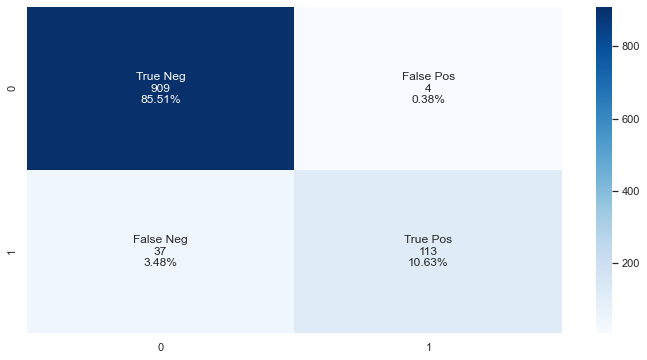

In [76]:
from catboost import CatBoostClassifier
Cat_model1 = CatBoostClassifier()
    
#     use_best_model=False

Cat_model1.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)
evaluate_model(X_train,y_train,Cat_model1) 

## 24.CatBoostClassifier - SMOTE

Learning rate set to 0.021297
0:	learn: 0.6797948	total: 12.1ms	remaining: 12.1s
1:	learn: 0.6680313	total: 23.8ms	remaining: 11.9s
2:	learn: 0.6548225	total: 35.9ms	remaining: 11.9s
3:	learn: 0.6424256	total: 51.5ms	remaining: 12.8s
4:	learn: 0.6313855	total: 65.5ms	remaining: 13s
5:	learn: 0.6213605	total: 80.7ms	remaining: 13.4s
6:	learn: 0.6105664	total: 94.9ms	remaining: 13.5s
7:	learn: 0.6016493	total: 108ms	remaining: 13.4s
8:	learn: 0.5930444	total: 122ms	remaining: 13.5s
9:	learn: 0.5828901	total: 136ms	remaining: 13.5s
10:	learn: 0.5756011	total: 152ms	remaining: 13.7s
11:	learn: 0.5677550	total: 166ms	remaining: 13.7s
12:	learn: 0.5612394	total: 181ms	remaining: 13.8s
13:	learn: 0.5527311	total: 197ms	remaining: 13.9s
14:	learn: 0.5462361	total: 212ms	remaining: 13.9s
15:	learn: 0.5395003	total: 227ms	remaining: 13.9s
16:	learn: 0.5330486	total: 242ms	remaining: 14s
17:	learn: 0.5248461	total: 257ms	remaining: 14s
18:	learn: 0.5180490	total: 272ms	remaining: 14s
19:	learn: 0

167:	learn: 0.2099717	total: 2s	remaining: 9.91s
168:	learn: 0.2096636	total: 2.02s	remaining: 9.91s
169:	learn: 0.2091740	total: 2.03s	remaining: 9.89s
170:	learn: 0.2087362	total: 2.04s	remaining: 9.88s
171:	learn: 0.2081754	total: 2.05s	remaining: 9.87s
172:	learn: 0.2076246	total: 2.06s	remaining: 9.85s
173:	learn: 0.2069694	total: 2.07s	remaining: 9.84s
174:	learn: 0.2066300	total: 2.08s	remaining: 9.81s
175:	learn: 0.2059301	total: 2.09s	remaining: 9.77s
176:	learn: 0.2056930	total: 2.1s	remaining: 9.74s
177:	learn: 0.2045177	total: 2.1s	remaining: 9.71s
178:	learn: 0.2038217	total: 2.11s	remaining: 9.67s
179:	learn: 0.2035657	total: 2.12s	remaining: 9.64s
180:	learn: 0.2030606	total: 2.13s	remaining: 9.62s
181:	learn: 0.2026493	total: 2.14s	remaining: 9.6s
182:	learn: 0.2018239	total: 2.15s	remaining: 9.58s
183:	learn: 0.2011085	total: 2.15s	remaining: 9.55s
184:	learn: 0.1998833	total: 2.16s	remaining: 9.53s
185:	learn: 0.1995858	total: 2.17s	remaining: 9.49s
186:	learn: 0.1991

347:	learn: 0.1443321	total: 3.99s	remaining: 7.48s
348:	learn: 0.1442436	total: 4.01s	remaining: 7.47s
349:	learn: 0.1436853	total: 4.02s	remaining: 7.46s
350:	learn: 0.1433071	total: 4.03s	remaining: 7.45s
351:	learn: 0.1431104	total: 4.05s	remaining: 7.45s
352:	learn: 0.1429448	total: 4.08s	remaining: 7.47s
353:	learn: 0.1427831	total: 4.09s	remaining: 7.47s
354:	learn: 0.1426352	total: 4.11s	remaining: 7.46s
355:	learn: 0.1422122	total: 4.13s	remaining: 7.47s
356:	learn: 0.1418845	total: 4.16s	remaining: 7.49s
357:	learn: 0.1415011	total: 4.17s	remaining: 7.49s
358:	learn: 0.1412366	total: 4.18s	remaining: 7.47s
359:	learn: 0.1411382	total: 4.19s	remaining: 7.46s
360:	learn: 0.1409284	total: 4.22s	remaining: 7.47s
361:	learn: 0.1406777	total: 4.23s	remaining: 7.45s
362:	learn: 0.1405518	total: 4.23s	remaining: 7.43s
363:	learn: 0.1404291	total: 4.24s	remaining: 7.41s
364:	learn: 0.1402479	total: 4.25s	remaining: 7.39s
365:	learn: 0.1400506	total: 4.25s	remaining: 7.37s
366:	learn: 

511:	learn: 0.1072651	total: 5.61s	remaining: 5.34s
512:	learn: 0.1071708	total: 5.63s	remaining: 5.34s
513:	learn: 0.1068912	total: 5.66s	remaining: 5.35s
514:	learn: 0.1065695	total: 5.68s	remaining: 5.35s
515:	learn: 0.1063428	total: 5.7s	remaining: 5.34s
516:	learn: 0.1061904	total: 5.71s	remaining: 5.34s
517:	learn: 0.1060646	total: 5.73s	remaining: 5.33s
518:	learn: 0.1058610	total: 5.74s	remaining: 5.32s
519:	learn: 0.1055483	total: 5.75s	remaining: 5.31s
520:	learn: 0.1054099	total: 5.75s	remaining: 5.29s
521:	learn: 0.1052715	total: 5.76s	remaining: 5.28s
522:	learn: 0.1051457	total: 5.77s	remaining: 5.26s
523:	learn: 0.1050026	total: 5.77s	remaining: 5.25s
524:	learn: 0.1049006	total: 5.78s	remaining: 5.23s
525:	learn: 0.1048000	total: 5.79s	remaining: 5.21s
526:	learn: 0.1047120	total: 5.79s	remaining: 5.2s
527:	learn: 0.1041238	total: 5.8s	remaining: 5.18s
528:	learn: 0.1039549	total: 5.81s	remaining: 5.17s
529:	learn: 0.1037675	total: 5.82s	remaining: 5.16s
530:	learn: 0.1

678:	learn: 0.0848964	total: 7.39s	remaining: 3.49s
679:	learn: 0.0847333	total: 7.4s	remaining: 3.48s
680:	learn: 0.0846543	total: 7.41s	remaining: 3.47s
681:	learn: 0.0845981	total: 7.42s	remaining: 3.46s
682:	learn: 0.0845196	total: 7.43s	remaining: 3.45s
683:	learn: 0.0844655	total: 7.44s	remaining: 3.44s
684:	learn: 0.0844249	total: 7.45s	remaining: 3.42s
685:	learn: 0.0842382	total: 7.45s	remaining: 3.41s
686:	learn: 0.0840345	total: 7.46s	remaining: 3.4s
687:	learn: 0.0840015	total: 7.46s	remaining: 3.38s
688:	learn: 0.0839160	total: 7.47s	remaining: 3.37s
689:	learn: 0.0838563	total: 7.48s	remaining: 3.36s
690:	learn: 0.0837980	total: 7.48s	remaining: 3.35s
691:	learn: 0.0837482	total: 7.49s	remaining: 3.33s
692:	learn: 0.0836795	total: 7.5s	remaining: 3.32s
693:	learn: 0.0835961	total: 7.5s	remaining: 3.31s
694:	learn: 0.0835402	total: 7.51s	remaining: 3.3s
695:	learn: 0.0834775	total: 7.52s	remaining: 3.28s
696:	learn: 0.0833998	total: 7.52s	remaining: 3.27s
697:	learn: 0.083

861:	learn: 0.0703080	total: 9.17s	remaining: 1.47s
862:	learn: 0.0702580	total: 9.18s	remaining: 1.46s
863:	learn: 0.0701903	total: 9.19s	remaining: 1.45s
864:	learn: 0.0701166	total: 9.21s	remaining: 1.44s
865:	learn: 0.0700110	total: 9.21s	remaining: 1.43s
866:	learn: 0.0699384	total: 9.22s	remaining: 1.41s
867:	learn: 0.0699164	total: 9.23s	remaining: 1.4s
868:	learn: 0.0698823	total: 9.23s	remaining: 1.39s
869:	learn: 0.0698608	total: 9.24s	remaining: 1.38s
870:	learn: 0.0697871	total: 9.25s	remaining: 1.37s
871:	learn: 0.0697299	total: 9.26s	remaining: 1.36s
872:	learn: 0.0697068	total: 9.26s	remaining: 1.35s
873:	learn: 0.0696687	total: 9.27s	remaining: 1.34s
874:	learn: 0.0696173	total: 9.28s	remaining: 1.32s
875:	learn: 0.0695622	total: 9.29s	remaining: 1.31s
876:	learn: 0.0695278	total: 9.29s	remaining: 1.3s
877:	learn: 0.0694926	total: 9.3s	remaining: 1.29s
878:	learn: 0.0694487	total: 9.31s	remaining: 1.28s
879:	learn: 0.0693243	total: 9.32s	remaining: 1.27s
880:	learn: 0.0

30:	learn: 0.4630776	total: 187ms	remaining: 5.84s
31:	learn: 0.4583433	total: 197ms	remaining: 5.96s
32:	learn: 0.4550516	total: 207ms	remaining: 6.08s
33:	learn: 0.4504241	total: 218ms	remaining: 6.19s
34:	learn: 0.4470445	total: 228ms	remaining: 6.28s
35:	learn: 0.4434918	total: 234ms	remaining: 6.27s
36:	learn: 0.4366170	total: 240ms	remaining: 6.24s
37:	learn: 0.4331563	total: 245ms	remaining: 6.21s
38:	learn: 0.4278005	total: 251ms	remaining: 6.19s
39:	learn: 0.4232751	total: 257ms	remaining: 6.16s
40:	learn: 0.4202048	total: 263ms	remaining: 6.15s
41:	learn: 0.4166927	total: 269ms	remaining: 6.12s
42:	learn: 0.4126628	total: 274ms	remaining: 6.1s
43:	learn: 0.4090188	total: 280ms	remaining: 6.08s
44:	learn: 0.4049767	total: 286ms	remaining: 6.07s
45:	learn: 0.4025426	total: 292ms	remaining: 6.05s
46:	learn: 0.3998415	total: 297ms	remaining: 6.02s
47:	learn: 0.3967238	total: 303ms	remaining: 6s
48:	learn: 0.3916174	total: 308ms	remaining: 5.98s
49:	learn: 0.3857553	total: 314ms	r

204:	learn: 0.1692907	total: 1.76s	remaining: 6.84s
205:	learn: 0.1688793	total: 1.78s	remaining: 6.85s
206:	learn: 0.1684418	total: 1.79s	remaining: 6.86s
207:	learn: 0.1678742	total: 1.81s	remaining: 6.88s
208:	learn: 0.1672386	total: 1.82s	remaining: 6.88s
209:	learn: 0.1668736	total: 1.83s	remaining: 6.87s
210:	learn: 0.1662319	total: 1.84s	remaining: 6.88s
211:	learn: 0.1651043	total: 1.85s	remaining: 6.88s
212:	learn: 0.1645855	total: 1.88s	remaining: 6.94s
213:	learn: 0.1640978	total: 1.89s	remaining: 6.94s
214:	learn: 0.1638221	total: 1.92s	remaining: 7s
215:	learn: 0.1630252	total: 1.93s	remaining: 7s
216:	learn: 0.1625071	total: 1.94s	remaining: 7s
217:	learn: 0.1620964	total: 1.94s	remaining: 6.98s
218:	learn: 0.1617256	total: 1.95s	remaining: 6.96s
219:	learn: 0.1614107	total: 1.96s	remaining: 6.94s
220:	learn: 0.1599431	total: 1.97s	remaining: 6.95s
221:	learn: 0.1597478	total: 1.98s	remaining: 6.96s
222:	learn: 0.1594756	total: 1.99s	remaining: 6.95s
223:	learn: 0.1593148

387:	learn: 0.1152446	total: 3.14s	remaining: 4.96s
388:	learn: 0.1149020	total: 3.15s	remaining: 4.95s
389:	learn: 0.1145415	total: 3.17s	remaining: 4.95s
390:	learn: 0.1142496	total: 3.18s	remaining: 4.95s
391:	learn: 0.1140821	total: 3.19s	remaining: 4.95s
392:	learn: 0.1139889	total: 3.2s	remaining: 4.94s
393:	learn: 0.1137680	total: 3.21s	remaining: 4.94s
394:	learn: 0.1136638	total: 3.22s	remaining: 4.93s
395:	learn: 0.1135768	total: 3.23s	remaining: 4.93s
396:	learn: 0.1130981	total: 3.24s	remaining: 4.92s
397:	learn: 0.1127292	total: 3.25s	remaining: 4.92s
398:	learn: 0.1124653	total: 3.27s	remaining: 4.92s
399:	learn: 0.1123553	total: 3.28s	remaining: 4.92s
400:	learn: 0.1122111	total: 3.29s	remaining: 4.91s
401:	learn: 0.1118805	total: 3.3s	remaining: 4.91s
402:	learn: 0.1116839	total: 3.32s	remaining: 4.92s
403:	learn: 0.1114936	total: 3.33s	remaining: 4.91s
404:	learn: 0.1112257	total: 3.34s	remaining: 4.91s
405:	learn: 0.1109382	total: 3.36s	remaining: 4.91s
406:	learn: 0.

554:	learn: 0.0759086	total: 4.74s	remaining: 3.8s
555:	learn: 0.0756824	total: 4.75s	remaining: 3.79s
556:	learn: 0.0754906	total: 4.76s	remaining: 3.79s
557:	learn: 0.0752118	total: 4.77s	remaining: 3.78s
558:	learn: 0.0749211	total: 4.78s	remaining: 3.77s
559:	learn: 0.0745582	total: 4.8s	remaining: 3.77s
560:	learn: 0.0744315	total: 4.81s	remaining: 3.76s
561:	learn: 0.0741403	total: 4.82s	remaining: 3.75s
562:	learn: 0.0740137	total: 4.83s	remaining: 3.75s
563:	learn: 0.0738215	total: 4.84s	remaining: 3.74s
564:	learn: 0.0736294	total: 4.85s	remaining: 3.73s
565:	learn: 0.0734679	total: 4.85s	remaining: 3.72s
566:	learn: 0.0729587	total: 4.86s	remaining: 3.71s
567:	learn: 0.0728567	total: 4.87s	remaining: 3.7s
568:	learn: 0.0727675	total: 4.87s	remaining: 3.69s
569:	learn: 0.0725953	total: 4.88s	remaining: 3.68s
570:	learn: 0.0723815	total: 4.88s	remaining: 3.67s
571:	learn: 0.0721877	total: 4.89s	remaining: 3.66s
572:	learn: 0.0720483	total: 4.9s	remaining: 3.65s
573:	learn: 0.07

720:	learn: 0.0520372	total: 6.84s	remaining: 2.65s
721:	learn: 0.0519673	total: 6.86s	remaining: 2.64s
722:	learn: 0.0519156	total: 6.87s	remaining: 2.63s
723:	learn: 0.0518208	total: 6.88s	remaining: 2.62s
724:	learn: 0.0517727	total: 6.89s	remaining: 2.61s
725:	learn: 0.0516710	total: 6.9s	remaining: 2.6s
726:	learn: 0.0515953	total: 6.91s	remaining: 2.59s
727:	learn: 0.0515476	total: 6.92s	remaining: 2.58s
728:	learn: 0.0515022	total: 6.93s	remaining: 2.58s
729:	learn: 0.0514661	total: 6.98s	remaining: 2.58s
730:	learn: 0.0514171	total: 7.03s	remaining: 2.59s
731:	learn: 0.0511246	total: 7.07s	remaining: 2.59s
732:	learn: 0.0510178	total: 7.12s	remaining: 2.59s
733:	learn: 0.0509404	total: 7.17s	remaining: 2.6s
734:	learn: 0.0507661	total: 7.2s	remaining: 2.6s
735:	learn: 0.0506410	total: 7.23s	remaining: 2.6s
736:	learn: 0.0505705	total: 7.25s	remaining: 2.58s
737:	learn: 0.0505259	total: 7.25s	remaining: 2.58s
738:	learn: 0.0504793	total: 7.27s	remaining: 2.57s
739:	learn: 0.0504

883:	learn: 0.0415967	total: 9.02s	remaining: 1.18s
884:	learn: 0.0415664	total: 9.09s	remaining: 1.18s
885:	learn: 0.0415400	total: 9.14s	remaining: 1.18s
886:	learn: 0.0415226	total: 9.15s	remaining: 1.17s
887:	learn: 0.0414894	total: 9.16s	remaining: 1.16s
888:	learn: 0.0414615	total: 9.16s	remaining: 1.14s
889:	learn: 0.0414272	total: 9.17s	remaining: 1.13s
890:	learn: 0.0414025	total: 9.18s	remaining: 1.12s
891:	learn: 0.0413096	total: 9.19s	remaining: 1.11s
892:	learn: 0.0411168	total: 9.2s	remaining: 1.1s
893:	learn: 0.0409091	total: 9.2s	remaining: 1.09s
894:	learn: 0.0408435	total: 9.21s	remaining: 1.08s
895:	learn: 0.0407950	total: 9.25s	remaining: 1.07s
896:	learn: 0.0407755	total: 9.26s	remaining: 1.06s
897:	learn: 0.0407227	total: 9.27s	remaining: 1.05s
898:	learn: 0.0406882	total: 9.28s	remaining: 1.04s
899:	learn: 0.0406601	total: 9.28s	remaining: 1.03s
900:	learn: 0.0404740	total: 9.29s	remaining: 1.02s
901:	learn: 0.0403484	total: 9.3s	remaining: 1.01s
902:	learn: 0.04

51:	learn: 0.4067554	total: 669ms	remaining: 12.2s
52:	learn: 0.4044186	total: 683ms	remaining: 12.2s
53:	learn: 0.4025287	total: 697ms	remaining: 12.2s
54:	learn: 0.4001681	total: 709ms	remaining: 12.2s
55:	learn: 0.3971185	total: 724ms	remaining: 12.2s
56:	learn: 0.3950531	total: 734ms	remaining: 12.1s
57:	learn: 0.3933005	total: 745ms	remaining: 12.1s
58:	learn: 0.3903306	total: 756ms	remaining: 12.1s
59:	learn: 0.3878564	total: 766ms	remaining: 12s
60:	learn: 0.3863653	total: 777ms	remaining: 12s
61:	learn: 0.3839044	total: 787ms	remaining: 11.9s
62:	learn: 0.3805542	total: 798ms	remaining: 11.9s
63:	learn: 0.3765411	total: 809ms	remaining: 11.8s
64:	learn: 0.3728197	total: 824ms	remaining: 11.8s
65:	learn: 0.3707514	total: 836ms	remaining: 11.8s
66:	learn: 0.3685408	total: 852ms	remaining: 11.9s
67:	learn: 0.3670494	total: 870ms	remaining: 11.9s
68:	learn: 0.3649817	total: 896ms	remaining: 12.1s
69:	learn: 0.3628712	total: 924ms	remaining: 12.3s
70:	learn: 0.3609912	total: 937ms	r

223:	learn: 0.2192894	total: 2.66s	remaining: 9.23s
224:	learn: 0.2187228	total: 2.71s	remaining: 9.34s
225:	learn: 0.2185324	total: 2.72s	remaining: 9.32s
226:	learn: 0.2181804	total: 2.73s	remaining: 9.29s
227:	learn: 0.2173804	total: 2.74s	remaining: 9.27s
228:	learn: 0.2170013	total: 2.74s	remaining: 9.24s
229:	learn: 0.2164543	total: 2.75s	remaining: 9.21s
230:	learn: 0.2159686	total: 2.76s	remaining: 9.19s
231:	learn: 0.2156042	total: 2.77s	remaining: 9.16s
232:	learn: 0.2151586	total: 2.78s	remaining: 9.14s
233:	learn: 0.2149506	total: 2.79s	remaining: 9.12s
234:	learn: 0.2146961	total: 2.82s	remaining: 9.18s
235:	learn: 0.2144032	total: 2.83s	remaining: 9.17s
236:	learn: 0.2139757	total: 2.85s	remaining: 9.16s
237:	learn: 0.2137321	total: 2.85s	remaining: 9.14s
238:	learn: 0.2134129	total: 2.86s	remaining: 9.12s
239:	learn: 0.2128767	total: 2.9s	remaining: 9.18s
240:	learn: 0.2125311	total: 2.91s	remaining: 9.15s
241:	learn: 0.2118534	total: 2.91s	remaining: 9.13s
242:	learn: 0

382:	learn: 0.1677566	total: 4.03s	remaining: 6.5s
383:	learn: 0.1675565	total: 4.04s	remaining: 6.49s
384:	learn: 0.1674050	total: 4.06s	remaining: 6.48s
385:	learn: 0.1672492	total: 4.07s	remaining: 6.47s
386:	learn: 0.1668746	total: 4.08s	remaining: 6.46s
387:	learn: 0.1667019	total: 4.09s	remaining: 6.45s
388:	learn: 0.1664863	total: 4.09s	remaining: 6.43s
389:	learn: 0.1663836	total: 4.1s	remaining: 6.42s
390:	learn: 0.1660850	total: 4.11s	remaining: 6.4s
391:	learn: 0.1658872	total: 4.12s	remaining: 6.39s
392:	learn: 0.1654035	total: 4.12s	remaining: 6.37s
393:	learn: 0.1651842	total: 4.13s	remaining: 6.36s
394:	learn: 0.1650912	total: 4.14s	remaining: 6.34s
395:	learn: 0.1649046	total: 4.15s	remaining: 6.33s
396:	learn: 0.1644932	total: 4.16s	remaining: 6.31s
397:	learn: 0.1642676	total: 4.16s	remaining: 6.3s
398:	learn: 0.1641474	total: 4.17s	remaining: 6.28s
399:	learn: 0.1639033	total: 4.18s	remaining: 6.27s
400:	learn: 0.1637816	total: 4.18s	remaining: 6.25s
401:	learn: 0.16

547:	learn: 0.1313195	total: 5.8s	remaining: 4.78s
548:	learn: 0.1311672	total: 5.81s	remaining: 4.78s
549:	learn: 0.1310815	total: 5.82s	remaining: 4.76s
550:	learn: 0.1307577	total: 5.84s	remaining: 4.76s
551:	learn: 0.1306772	total: 5.85s	remaining: 4.75s
552:	learn: 0.1305578	total: 5.86s	remaining: 4.74s
553:	learn: 0.1304123	total: 5.87s	remaining: 4.73s
554:	learn: 0.1302904	total: 5.88s	remaining: 4.71s
555:	learn: 0.1301379	total: 5.89s	remaining: 4.71s
556:	learn: 0.1300160	total: 5.9s	remaining: 4.7s
557:	learn: 0.1297187	total: 5.92s	remaining: 4.68s
558:	learn: 0.1296371	total: 5.92s	remaining: 4.67s
559:	learn: 0.1295396	total: 5.94s	remaining: 4.67s
560:	learn: 0.1292702	total: 5.95s	remaining: 4.66s
561:	learn: 0.1291335	total: 5.96s	remaining: 4.65s
562:	learn: 0.1289665	total: 5.97s	remaining: 4.64s
563:	learn: 0.1288429	total: 5.98s	remaining: 4.63s
564:	learn: 0.1287699	total: 6s	remaining: 4.62s
565:	learn: 0.1284686	total: 6.01s	remaining: 4.61s
566:	learn: 0.1283

717:	learn: 0.1050810	total: 7.65s	remaining: 3s
718:	learn: 0.1049924	total: 7.66s	remaining: 3s
719:	learn: 0.1049015	total: 7.67s	remaining: 2.98s
720:	learn: 0.1047493	total: 7.69s	remaining: 2.98s
721:	learn: 0.1046612	total: 7.7s	remaining: 2.96s
722:	learn: 0.1045750	total: 7.7s	remaining: 2.95s
723:	learn: 0.1045158	total: 7.71s	remaining: 2.94s
724:	learn: 0.1043959	total: 7.71s	remaining: 2.93s
725:	learn: 0.1043269	total: 7.72s	remaining: 2.91s
726:	learn: 0.1042348	total: 7.73s	remaining: 2.9s
727:	learn: 0.1041665	total: 7.73s	remaining: 2.89s
728:	learn: 0.1040510	total: 7.74s	remaining: 2.88s
729:	learn: 0.1039136	total: 7.74s	remaining: 2.86s
730:	learn: 0.1038500	total: 7.75s	remaining: 2.85s
731:	learn: 0.1037305	total: 7.76s	remaining: 2.84s
732:	learn: 0.1036998	total: 7.76s	remaining: 2.83s
733:	learn: 0.1036275	total: 7.77s	remaining: 2.81s
734:	learn: 0.1035996	total: 7.77s	remaining: 2.8s
735:	learn: 0.1034568	total: 7.78s	remaining: 2.79s
736:	learn: 0.1033155	

901:	learn: 0.0888654	total: 8.83s	remaining: 960ms
902:	learn: 0.0888392	total: 8.84s	remaining: 950ms
903:	learn: 0.0887723	total: 8.85s	remaining: 940ms
904:	learn: 0.0886982	total: 8.86s	remaining: 930ms
905:	learn: 0.0886379	total: 8.87s	remaining: 920ms
906:	learn: 0.0885739	total: 8.88s	remaining: 910ms
907:	learn: 0.0884852	total: 8.88s	remaining: 900ms
908:	learn: 0.0883902	total: 8.89s	remaining: 890ms
909:	learn: 0.0883690	total: 8.89s	remaining: 880ms
910:	learn: 0.0883117	total: 8.9s	remaining: 869ms
911:	learn: 0.0882637	total: 8.9s	remaining: 859ms
912:	learn: 0.0880252	total: 8.91s	remaining: 849ms
913:	learn: 0.0879653	total: 8.91s	remaining: 839ms
914:	learn: 0.0879067	total: 8.92s	remaining: 829ms
915:	learn: 0.0878376	total: 8.93s	remaining: 819ms
916:	learn: 0.0877274	total: 8.93s	remaining: 808ms
917:	learn: 0.0877125	total: 8.94s	remaining: 798ms
918:	learn: 0.0876643	total: 8.94s	remaining: 788ms
919:	learn: 0.0875982	total: 8.95s	remaining: 778ms
920:	learn: 0.

79:	learn: 0.3480522	total: 501ms	remaining: 5.76s
80:	learn: 0.3462912	total: 511ms	remaining: 5.8s
81:	learn: 0.3450168	total: 522ms	remaining: 5.84s
82:	learn: 0.3424860	total: 532ms	remaining: 5.88s
83:	learn: 0.3397127	total: 543ms	remaining: 5.93s
84:	learn: 0.3387422	total: 549ms	remaining: 5.91s
85:	learn: 0.3366337	total: 555ms	remaining: 5.9s
86:	learn: 0.3351383	total: 561ms	remaining: 5.88s
87:	learn: 0.3341708	total: 566ms	remaining: 5.87s
88:	learn: 0.3329320	total: 572ms	remaining: 5.85s
89:	learn: 0.3309656	total: 578ms	remaining: 5.84s
90:	learn: 0.3300136	total: 583ms	remaining: 5.83s
91:	learn: 0.3285969	total: 590ms	remaining: 5.82s
92:	learn: 0.3271100	total: 595ms	remaining: 5.81s
93:	learn: 0.3263158	total: 601ms	remaining: 5.79s
94:	learn: 0.3236733	total: 607ms	remaining: 5.78s
95:	learn: 0.3219827	total: 612ms	remaining: 5.77s
96:	learn: 0.3205867	total: 618ms	remaining: 5.75s
97:	learn: 0.3189366	total: 623ms	remaining: 5.74s
98:	learn: 0.3176385	total: 629ms

253:	learn: 0.2122095	total: 1.68s	remaining: 4.92s
254:	learn: 0.2116202	total: 1.69s	remaining: 4.93s
255:	learn: 0.2114115	total: 1.7s	remaining: 4.93s
256:	learn: 0.2109255	total: 1.71s	remaining: 4.93s
257:	learn: 0.2104515	total: 1.72s	remaining: 4.94s
258:	learn: 0.2097219	total: 1.73s	remaining: 4.93s
259:	learn: 0.2094665	total: 1.73s	remaining: 4.93s
260:	learn: 0.2089728	total: 1.74s	remaining: 4.92s
261:	learn: 0.2084501	total: 1.74s	remaining: 4.91s
262:	learn: 0.2076828	total: 1.75s	remaining: 4.9s
263:	learn: 0.2075242	total: 1.75s	remaining: 4.89s
264:	learn: 0.2073547	total: 1.76s	remaining: 4.88s
265:	learn: 0.2070707	total: 1.77s	remaining: 4.88s
266:	learn: 0.2065575	total: 1.78s	remaining: 4.88s
267:	learn: 0.2062945	total: 1.78s	remaining: 4.88s
268:	learn: 0.2059449	total: 1.79s	remaining: 4.87s
269:	learn: 0.2056469	total: 1.8s	remaining: 4.86s
270:	learn: 0.2052320	total: 1.81s	remaining: 4.86s
271:	learn: 0.2049826	total: 1.82s	remaining: 4.87s
272:	learn: 0.2

428:	learn: 0.1620545	total: 3.11s	remaining: 4.14s
429:	learn: 0.1618944	total: 3.13s	remaining: 4.14s
430:	learn: 0.1617267	total: 3.16s	remaining: 4.17s
431:	learn: 0.1615671	total: 3.17s	remaining: 4.17s
432:	learn: 0.1613540	total: 3.18s	remaining: 4.17s
433:	learn: 0.1612452	total: 3.19s	remaining: 4.16s
434:	learn: 0.1610622	total: 3.21s	remaining: 4.17s
435:	learn: 0.1607938	total: 3.23s	remaining: 4.18s
436:	learn: 0.1606401	total: 3.24s	remaining: 4.17s
437:	learn: 0.1602005	total: 3.25s	remaining: 4.16s
438:	learn: 0.1597887	total: 3.25s	remaining: 4.16s
439:	learn: 0.1596411	total: 3.26s	remaining: 4.15s
440:	learn: 0.1594331	total: 3.27s	remaining: 4.14s
441:	learn: 0.1591529	total: 3.27s	remaining: 4.13s
442:	learn: 0.1588486	total: 3.28s	remaining: 4.12s
443:	learn: 0.1586423	total: 3.28s	remaining: 4.11s
444:	learn: 0.1584224	total: 3.29s	remaining: 4.1s
445:	learn: 0.1583166	total: 3.29s	remaining: 4.09s
446:	learn: 0.1581553	total: 3.3s	remaining: 4.08s
447:	learn: 0.

603:	learn: 0.1254010	total: 4.28s	remaining: 2.81s
604:	learn: 0.1252657	total: 4.29s	remaining: 2.8s
605:	learn: 0.1251546	total: 4.3s	remaining: 2.8s
606:	learn: 0.1248932	total: 4.31s	remaining: 2.79s
607:	learn: 0.1245756	total: 4.33s	remaining: 2.79s
608:	learn: 0.1243682	total: 4.33s	remaining: 2.78s
609:	learn: 0.1242433	total: 4.34s	remaining: 2.77s
610:	learn: 0.1240330	total: 4.34s	remaining: 2.76s
611:	learn: 0.1238855	total: 4.35s	remaining: 2.76s
612:	learn: 0.1237294	total: 4.35s	remaining: 2.75s
613:	learn: 0.1235526	total: 4.36s	remaining: 2.74s
614:	learn: 0.1232516	total: 4.37s	remaining: 2.73s
615:	learn: 0.1231257	total: 4.37s	remaining: 2.73s
616:	learn: 0.1230557	total: 4.38s	remaining: 2.72s
617:	learn: 0.1228508	total: 4.38s	remaining: 2.71s
618:	learn: 0.1226670	total: 4.39s	remaining: 2.7s
619:	learn: 0.1223961	total: 4.39s	remaining: 2.69s
620:	learn: 0.1222764	total: 4.4s	remaining: 2.69s
621:	learn: 0.1221495	total: 4.41s	remaining: 2.68s
622:	learn: 0.122

782:	learn: 0.1022767	total: 5.47s	remaining: 1.52s
783:	learn: 0.1021461	total: 5.49s	remaining: 1.51s
784:	learn: 0.1020834	total: 5.5s	remaining: 1.5s
785:	learn: 0.1020177	total: 5.51s	remaining: 1.5s
786:	learn: 0.1019144	total: 5.51s	remaining: 1.49s
787:	learn: 0.1018456	total: 5.52s	remaining: 1.49s
788:	learn: 0.1017926	total: 5.53s	remaining: 1.48s
789:	learn: 0.1016055	total: 5.53s	remaining: 1.47s
790:	learn: 0.1013837	total: 5.54s	remaining: 1.46s
791:	learn: 0.1013013	total: 5.54s	remaining: 1.46s
792:	learn: 0.1011756	total: 5.55s	remaining: 1.45s
793:	learn: 0.1011117	total: 5.55s	remaining: 1.44s
794:	learn: 0.1010354	total: 5.56s	remaining: 1.43s
795:	learn: 0.1009616	total: 5.57s	remaining: 1.43s
796:	learn: 0.1008738	total: 5.57s	remaining: 1.42s
797:	learn: 0.1005119	total: 5.58s	remaining: 1.41s
798:	learn: 0.1004760	total: 5.58s	remaining: 1.4s
799:	learn: 0.1003801	total: 5.59s	remaining: 1.4s
800:	learn: 0.1002878	total: 5.59s	remaining: 1.39s
801:	learn: 0.100

954:	learn: 0.0866513	total: 6.7s	remaining: 316ms
955:	learn: 0.0865939	total: 6.71s	remaining: 309ms
956:	learn: 0.0865582	total: 6.72s	remaining: 302ms
957:	learn: 0.0864651	total: 6.73s	remaining: 295ms
958:	learn: 0.0863620	total: 6.74s	remaining: 288ms
959:	learn: 0.0862512	total: 6.75s	remaining: 281ms
960:	learn: 0.0860809	total: 6.75s	remaining: 274ms
961:	learn: 0.0859382	total: 6.76s	remaining: 267ms
962:	learn: 0.0859158	total: 6.76s	remaining: 260ms
963:	learn: 0.0858655	total: 6.77s	remaining: 253ms
964:	learn: 0.0858402	total: 6.77s	remaining: 246ms
965:	learn: 0.0858191	total: 6.78s	remaining: 239ms
966:	learn: 0.0857522	total: 6.79s	remaining: 232ms
967:	learn: 0.0857197	total: 6.79s	remaining: 225ms
968:	learn: 0.0856366	total: 6.8s	remaining: 217ms
969:	learn: 0.0855364	total: 6.8s	remaining: 210ms
970:	learn: 0.0854796	total: 6.81s	remaining: 203ms
971:	learn: 0.0854446	total: 6.81s	remaining: 196ms
972:	learn: 0.0853571	total: 6.82s	remaining: 189ms
973:	learn: 0.0

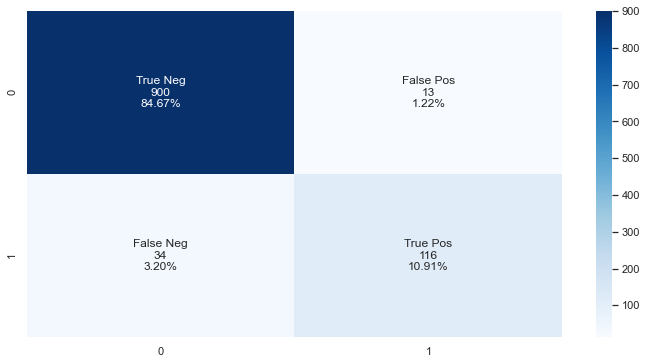

In [77]:
Cat_model1_SMOTE = CatBoostClassifier()
evaluate_model(X_train_Smote,y_train_Smote,Cat_model1_SMOTE)

## Hyperparameter tunning - GridSearchCV

binary classification:Logloss

probabilities in target : CrossEntropy

## 25.CatBoostClassifier Using GridSearch 

In [78]:
from catboost import CatBoostClassifier
CBC_Gridcv = CatBoostClassifier(
    iterations=500,
    depth=7,random_seed=63,
    learning_rate=0.1,
    verbose=10,
    custom_loss=['AUC', 'Accuracy']
    #use_best_model=True
    # loss_function='CrossEntropy'
)
CBC_Gridcv.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(CBC_Gridcv.is_fitted()))
print('Model params:')
print(CBC_Gridcv.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'iterations': 500, 'learning_rate': 0.1, 'depth': 7, 'random_seed': 63, 'verbose': 10, 'custom_loss': ['AUC', 'Accuracy']}


### Model predictions

0:	learn: 0.5712326	total: 12.3ms	remaining: 6.12s
10:	learn: 0.2307616	total: 133ms	remaining: 5.9s
20:	learn: 0.1670397	total: 251ms	remaining: 5.72s
30:	learn: 0.1380813	total: 365ms	remaining: 5.52s
40:	learn: 0.1240058	total: 475ms	remaining: 5.32s
50:	learn: 0.1143304	total: 570ms	remaining: 5.02s
60:	learn: 0.1059570	total: 631ms	remaining: 4.54s
70:	learn: 0.1006581	total: 706ms	remaining: 4.26s
80:	learn: 0.0949339	total: 774ms	remaining: 4s
90:	learn: 0.0898496	total: 834ms	remaining: 3.75s
100:	learn: 0.0851160	total: 894ms	remaining: 3.53s
110:	learn: 0.0810401	total: 976ms	remaining: 3.42s
120:	learn: 0.0774591	total: 1.04s	remaining: 3.26s
130:	learn: 0.0718447	total: 1.1s	remaining: 3.11s
140:	learn: 0.0677479	total: 1.16s	remaining: 2.96s
150:	learn: 0.0639169	total: 1.25s	remaining: 2.9s
160:	learn: 0.0597580	total: 1.31s	remaining: 2.77s
170:	learn: 0.0565429	total: 1.37s	remaining: 2.64s
180:	learn: 0.0535563	total: 1.44s	remaining: 2.53s
190:	learn: 0.0511739	total:

70:	learn: 0.0902814	total: 440ms	remaining: 2.66s
80:	learn: 0.0839755	total: 496ms	remaining: 2.56s
90:	learn: 0.0789228	total: 552ms	remaining: 2.48s
100:	learn: 0.0739823	total: 608ms	remaining: 2.4s
110:	learn: 0.0685484	total: 680ms	remaining: 2.38s
120:	learn: 0.0624455	total: 737ms	remaining: 2.31s
130:	learn: 0.0577142	total: 792ms	remaining: 2.23s
140:	learn: 0.0526508	total: 851ms	remaining: 2.17s
150:	learn: 0.0497115	total: 924ms	remaining: 2.14s
160:	learn: 0.0466903	total: 981ms	remaining: 2.06s
170:	learn: 0.0430836	total: 1.04s	remaining: 1.99s
180:	learn: 0.0392808	total: 1.09s	remaining: 1.93s
190:	learn: 0.0364998	total: 1.17s	remaining: 1.89s
200:	learn: 0.0332238	total: 1.22s	remaining: 1.82s
210:	learn: 0.0314903	total: 1.28s	remaining: 1.75s
220:	learn: 0.0295228	total: 1.34s	remaining: 1.69s
230:	learn: 0.0277328	total: 1.41s	remaining: 1.64s
240:	learn: 0.0265117	total: 1.47s	remaining: 1.58s
250:	learn: 0.0244594	total: 1.52s	remaining: 1.51s
260:	learn: 0.02

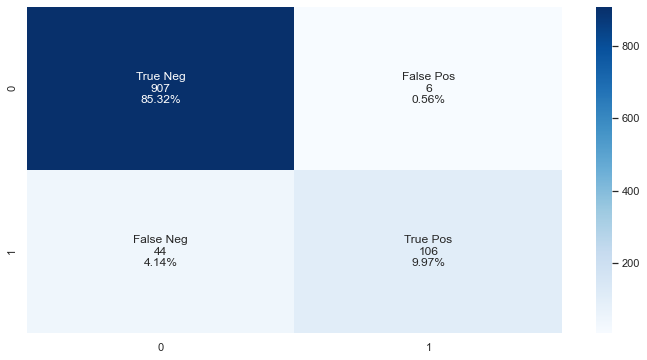

In [79]:
#Predicsions after hyperparameter tunning
evaluate_model(X_train,y_train,CBC_Gridcv) 

## 26.CatBoostClassifier Using GridSearch-SMOTE

In [80]:
CBC_Gridcv_Smote = CatBoostClassifier(
    iterations=500,
    depth=7,random_seed=63,
    learning_rate=0.1,
    verbose=10,
    custom_loss=['AUC', 'Accuracy']
    #use_best_model=True
    # loss_function='CrossEntropy'
)
CBC_Gridcv_Smote.fit(
    X_train_Smote, y_train_Smote,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(CBC_Gridcv_Smote.is_fitted()))
print('Model params:')
print(CBC_Gridcv_Smote.get_params())


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'iterations': 500, 'learning_rate': 0.1, 'depth': 7, 'random_seed': 63, 'verbose': 10, 'custom_loss': ['AUC', 'Accuracy']}


0:	learn: 0.6265718	total: 18.2ms	remaining: 9.07s
10:	learn: 0.3318403	total: 208ms	remaining: 9.23s
20:	learn: 0.2385333	total: 380ms	remaining: 8.67s
30:	learn: 0.1978837	total: 582ms	remaining: 8.81s
40:	learn: 0.1694679	total: 740ms	remaining: 8.29s
50:	learn: 0.1504290	total: 908ms	remaining: 8s
60:	learn: 0.1353794	total: 1.05s	remaining: 7.58s
70:	learn: 0.1263234	total: 1.17s	remaining: 7.09s
80:	learn: 0.1166409	total: 1.27s	remaining: 6.59s
90:	learn: 0.1053643	total: 1.36s	remaining: 6.13s
100:	learn: 0.0948699	total: 1.48s	remaining: 5.84s
110:	learn: 0.0873957	total: 1.57s	remaining: 5.5s
120:	learn: 0.0802915	total: 1.66s	remaining: 5.2s
130:	learn: 0.0743504	total: 1.84s	remaining: 5.19s
140:	learn: 0.0701598	total: 1.93s	remaining: 4.92s
150:	learn: 0.0657041	total: 2.03s	remaining: 4.68s
160:	learn: 0.0622797	total: 2.14s	remaining: 4.51s
170:	learn: 0.0587584	total: 2.23s	remaining: 4.3s
180:	learn: 0.0560982	total: 2.32s	remaining: 4.09s
190:	learn: 0.0535840	total:

70:	learn: 0.1441713	total: 988ms	remaining: 5.97s
80:	learn: 0.1347951	total: 1.08s	remaining: 5.6s
90:	learn: 0.1233629	total: 1.17s	remaining: 5.25s
100:	learn: 0.1148941	total: 1.27s	remaining: 5.02s
110:	learn: 0.1054006	total: 1.36s	remaining: 4.75s
120:	learn: 0.0955780	total: 1.44s	remaining: 4.51s
130:	learn: 0.0859722	total: 1.54s	remaining: 4.35s
140:	learn: 0.0804623	total: 1.63s	remaining: 4.15s
150:	learn: 0.0757543	total: 1.71s	remaining: 3.96s
160:	learn: 0.0713326	total: 1.82s	remaining: 3.83s
170:	learn: 0.0655532	total: 1.9s	remaining: 3.66s
180:	learn: 0.0626975	total: 1.99s	remaining: 3.5s
190:	learn: 0.0587066	total: 2.09s	remaining: 3.38s
200:	learn: 0.0552636	total: 2.17s	remaining: 3.23s
210:	learn: 0.0525619	total: 2.29s	remaining: 3.13s
220:	learn: 0.0504038	total: 2.47s	remaining: 3.12s
230:	learn: 0.0476893	total: 2.63s	remaining: 3.06s
240:	learn: 0.0451153	total: 2.74s	remaining: 2.95s
250:	learn: 0.0431704	total: 2.83s	remaining: 2.8s
260:	learn: 0.04124

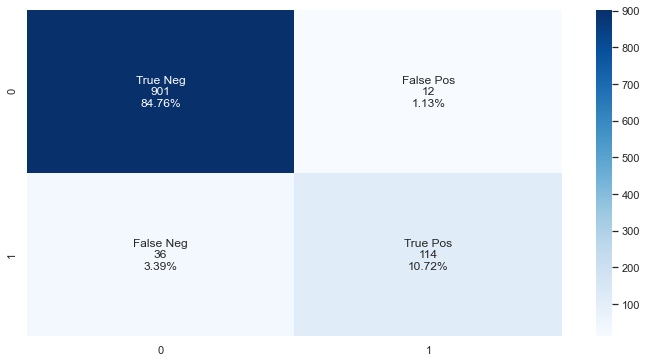

In [81]:
evaluate_model(X_train_Smote,y_train_Smote,CBC_Gridcv_Smote)

## 27.Keras-Classification

In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [184]:
keras = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

keras.add(Dense(units=30,activation='relu'))

keras.add(Dense(units=15,activation='relu'))


keras.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
keras.compile(loss='binary_crossentropy', optimizer='adam')

In [185]:
keras.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

100/100 [==============================] - 1s 5ms/step - loss: 0.5189 - val_loss: 0.4086
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3984 - val_loss: 0.3928
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3806 - val_loss: 0.3774
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3623 - val_loss: 0.3667
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3451 - val_loss: 0.3587
Epo

100/100 [==============================] - 0s 3ms/step - loss: 0.1243 - val_loss: 0.3884
Epoch 75/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1256 - val_loss: 0.4001
Epoch 76/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1232 - val_loss: 0.3954
Epoch 77/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1233 - val_loss: 0.3959
Epoch 78/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1218 - val_loss: 0.4057
Epoch 79/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1195 - val_loss: 0.4090
Epoch 80/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1202 - val_loss: 0.3994
Epoch 81/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1184 - val_loss: 0.3985
Epoch 82/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.4187
Epoch 83/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1183 - val_loss: 

In [186]:
keras_loss = pd.DataFrame(keras.history.history)
keras_loss

loss  val_loss
0   0.518926  0.408610
1   0.398359  0.392800
2   0.380617  0.377421
3   0.362294  0.366744
4   0.345132  0.358678
..       ...       ...
95  0.103929  0.436420
96  0.104351  0.451388
97  0.102857  0.465145
98  0.102732  0.446053
99  0.102725  0.465566

[100 rows x 2 columns]

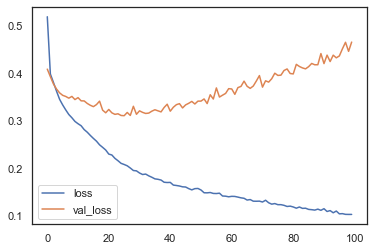

In [187]:
keras_loss.plot()

In [188]:
#Early Stopping
keras = Sequential()
keras.add(Dense(units=30,activation='relu'))
keras.add(Dense(units=15,activation='relu'))
keras.add(Dense(units=1,activation='sigmoid'))
keras.compile(loss='binary_crossentropy', optimizer='adam')

In [189]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [190]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
keras.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

100/100 [==============================] - 0s 5ms/step - loss: 0.4376 - val_loss: 0.3976
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3895 - val_loss: 0.3824
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3684 - val_loss: 0.3650
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3455 - val_loss: 0.3551
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3290 - val_loss: 0.3507
Epo

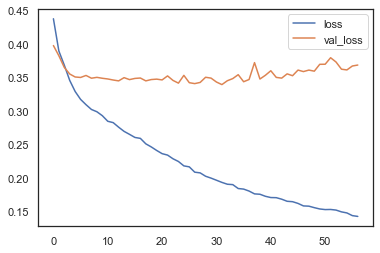

In [191]:
model_loss = pd.DataFrame(keras.history.history)
model_loss.plot()

#### Adding in DropOut Layers

In [223]:
from tensorflow.keras.layers import Dropout
keras = Sequential()
keras.add(Dense(units=30,activation='relu'))
keras.add(Dropout(0.5))

keras.add(Dense(units=15,activation='relu'))
keras.add(Dropout(0.5))

keras.add(Dense(units=1,activation='sigmoid'))
keras.compile(loss='binary_crossentropy', optimizer='adam')

In [224]:
keras.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

100/100 [==============================] - 0s 5ms/step - loss: 0.5961 - val_loss: 0.4121
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4634 - val_loss: 0.3993
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4361 - val_loss: 0.3861
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4267 - val_loss: 0.3781
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4048 - val_loss: 0.3762
Epo

100/100 [==============================] - 0s 3ms/step - loss: 0.2240 - val_loss: 0.3308
Epoch 75/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2176 - val_loss: 0.3281
Epoch 76/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2117 - val_loss: 0.3427
Epoch 77/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2267 - val_loss: 0.3215
Epoch 78/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2151 - val_loss: 0.3299
Epoch 79/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2027 - val_loss: 0.3353
Epoch 80/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2198 - val_loss: 0.3333
Epoch 00080: early stopping


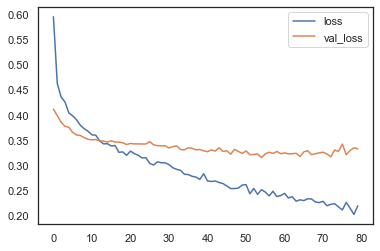

In [225]:
keras_loss = pd.DataFrame(keras.history.history)
keras_loss.plot()

In [226]:
#Model evaluation
predictions = keras.predict_classes(X_test)
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

Keras accuracy score: 0.8842897460018815
------------------------------------------------------------------
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       913
           1       0.65      0.39      0.49       150

    accuracy                           0.88      1063
   macro avg       0.78      0.68      0.71      1063
weighted avg       0.87      0.88      0.87      1063



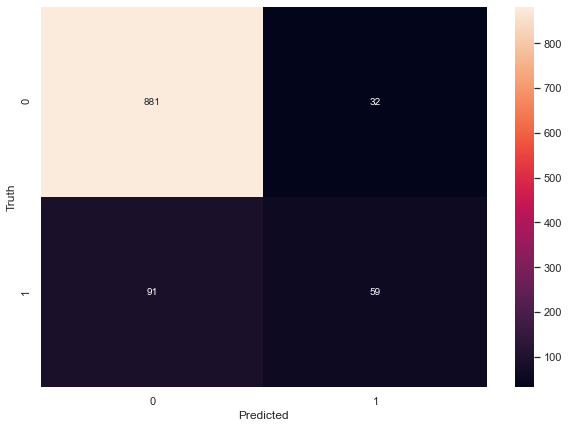

In [227]:
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.metrics import accuracy_score
Keras_Accuracy = accuracy_score(y_test,predictions)
print('Keras accuracy score:',Keras_Accuracy)
print('------------------------------------------------------------------')
#Confusion Matrix 1
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))


## 28. Keras with Smote

In [197]:
keras_Smote = Sequential()

In [198]:


# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

keras_Smote.add(Dense(units=30,activation='relu'))

keras_Smote.add(Dense(units=15,activation='relu'))


keras_Smote.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
keras_Smote.compile(loss='binary_crossentropy', optimizer='adam')

In [199]:

keras_Smote.fit(x=X_train_Smote, 
          y=y_train_Smote, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

172/172 [==============================] - 0s 3ms/step - loss: 0.6261 - val_loss: 0.6003
Epoch 2/100
172/172 [==============================] - 0s 3ms/step - loss: 0.4884 - val_loss: 0.6326
Epoch 3/100
172/172 [==============================] - 1s 4ms/step - loss: 0.4092 - val_loss: 0.4558
Epoch 4/100
172/172 [==============================] - 1s 3ms/step - loss: 0.3687 - val_loss: 0.4545
Epoch 5/100
172/172 [==============================] - 1s 3ms/step - loss: 0.3428 - val_loss: 0.5144
Epo

In [200]:
keras_Smote_loss = pd.DataFrame(keras_Smote.history.history)
keras_Smote_loss

loss  val_loss
0   0.626126  0.600272
1   0.488443  0.632585
2   0.409168  0.455834
3   0.368694  0.454476
4   0.342750  0.514434
5   0.324954  0.475076
6   0.306975  0.528408
7   0.294562  0.519968
8   0.283601  0.446197
9   0.270653  0.533383
10  0.264573  0.498853
11  0.253106  0.506158
12  0.245878  0.477733
13  0.237250  0.460971
14  0.238670  0.532810
15  0.228382  0.516383
16  0.223271  0.458571
17  0.224182  0.439422
18  0.212801  0.481780
19  0.209864  0.483650
20  0.205661  0.462359
21  0.202132  0.530795
22  0.198829  0.526256
23  0.188397  0.460485
24  0.185004  0.472043
25  0.181389  0.561193
26  0.180228  0.488368
27  0.174202  0.496209
28  0.171618  0.477251
29  0.170847  0.493955
30  0.168593  0.504604
31  0.162882  0.545818
32  0.164387  0.507987
33  0.155657  0.520929
34  0.152733  0.537891
35  0.152711  0.534601
36  0.148223  0.586701
37  0.157569  0.607080
38  0.150591  0.560862
39  0.141620  0.607745
40  0.142033  0.549242
41  0.137856  0.573019
42  0.136481  0.564909

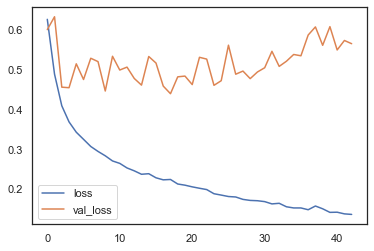

In [201]:
keras_Smote_loss.plot()

In [202]:
#Early Stopping
keras_Smote = Sequential()
keras_Smote.add(Dense(units=30,activation='relu'))
keras_Smote.add(Dense(units=15,activation='relu'))
keras_Smote.add(Dense(units=1,activation='sigmoid'))
keras_Smote.compile(loss='binary_crossentropy', optimizer='adam')

In [203]:
from tensorflow.keras.callbacks import EarlyStopping

In [204]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
keras_Smote.fit(x=X_train_Smote, 
          y=y_train_Smote, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

172/172 [==============================] - 1s 4ms/step - loss: 0.6449 - val_loss: 0.6130
Epoch 2/100
172/172 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4600
Epoch 3/100
172/172 [==============================] - 0s 3ms/step - loss: 0.4078 - val_loss: 0.5160
Epoch 4/100
172/172 [==============================] - 0s 2ms/step - loss: 0.3742 - val_loss: 0.4758
Epoch 5/100
172/172 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.5624
Epo

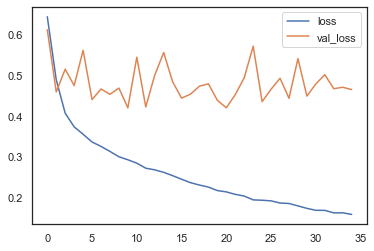

In [205]:
model_loss = pd.DataFrame(keras_Smote.history.history)
model_loss.plot()

### Adding dropout layers

In [206]:
from tensorflow.keras.layers import Dropout
keras_Smote = Sequential()
keras_Smote.add(Dense(units=30,activation='relu'))
keras_Smote.add(Dropout(0.5))

keras_Smote.add(Dense(units=15,activation='relu'))
keras_Smote.add(Dropout(0.5))

keras_Smote.add(Dense(units=1,activation='sigmoid'))
keras_Smote.compile(loss='binary_crossentropy', optimizer='adam')

In [207]:
keras_Smote.fit(x=X_train_Smote, 
          y=y_train_Smote, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

172/172 [==============================] - 1s 4ms/step - loss: 0.6885 - val_loss: 0.6717
Epoch 2/100
172/172 [==============================] - 0s 3ms/step - loss: 0.6648 - val_loss: 0.6242
Epoch 3/100
172/172 [==============================] - 0s 3ms/step - loss: 0.6383 - val_loss: 0.5948
Epoch 4/100
172/172 [==============================] - 1s 3ms/step - loss: 0.5959 - val_loss: 0.5408
Epoch 5/100
172/172 [==============================] - 1s 3ms/step - loss: 0.5595 - val_loss: 0.5157
Epo

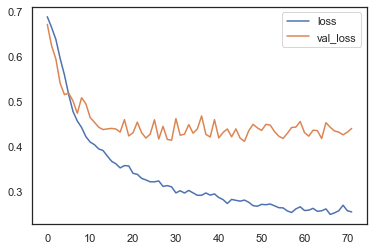

In [208]:
keras_Smote_loss = pd.DataFrame(keras_Smote.history.history)
keras_Smote_loss.plot()

In [214]:
#Model evaluation
predictions = keras_Smote.predict_classes(X_test).ravel()


Keras accuracy score: 0.8842897460018815
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       913
           1       0.65      0.39      0.49       150

    accuracy                           0.88      1063
   macro avg       0.78      0.68      0.71      1063
weighted avg       0.87      0.88      0.87      1063



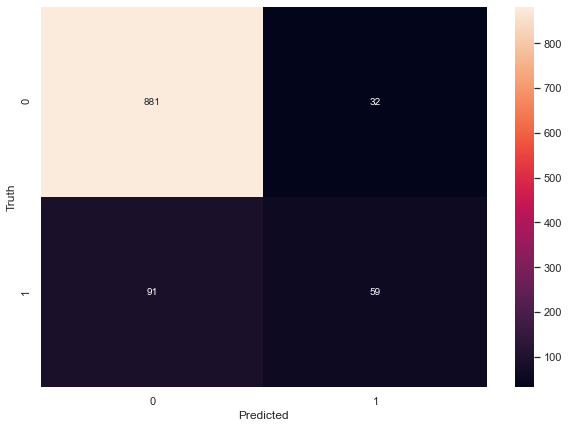

In [243]:
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.metrics import accuracy_score
Keras_Smote_Accuracy = accuracy_score(y_test,predictions)
print('Keras accuracy score:',Keras_Smote_Accuracy)

cm_Smote = tf.math.confusion_matrix(labels=y_test,predictions=predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


print(classification_report(y_test,predictions))



## Models Summary reports

In [211]:
## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [212]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (20, 8))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'coolwarm', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

-------
- SVM -
-------
Accuracy : 0.8589 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7787                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


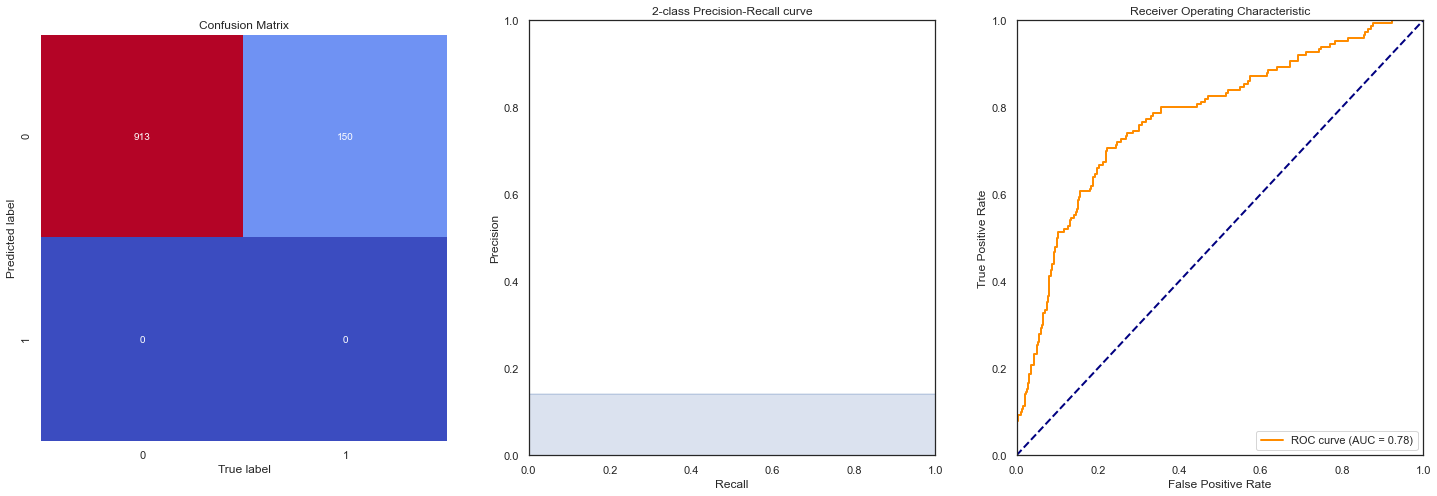


-------------
- SVM_SMOTE -
-------------
Accuracy : 0.7846 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3564 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6533 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7739                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


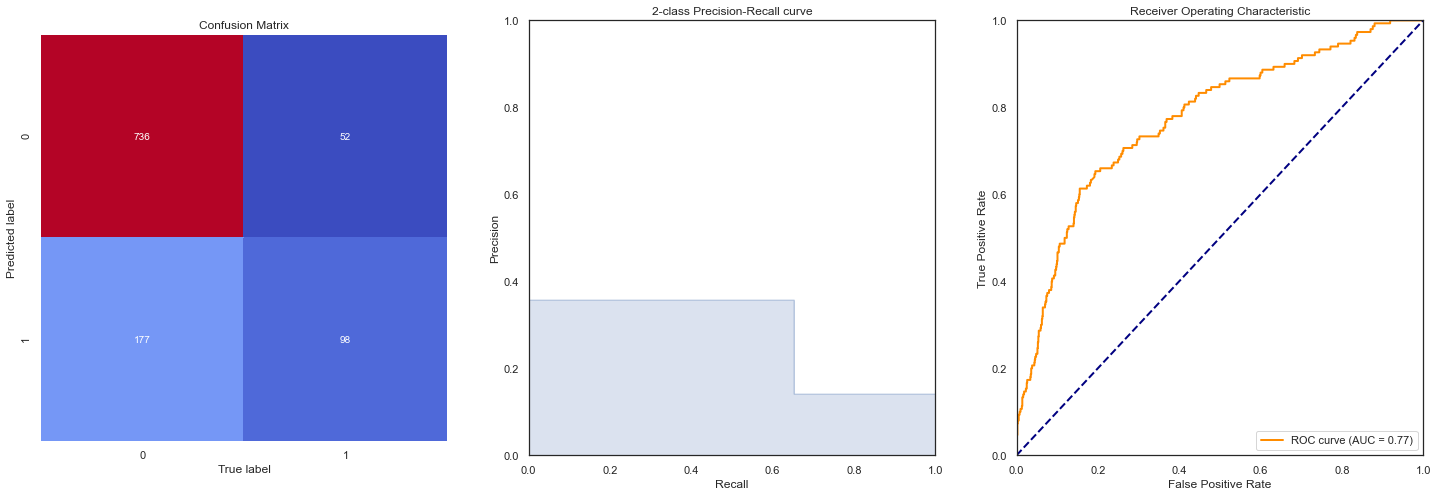


----------------------
- LogisticRegression -
----------------------
Accuracy : 0.8514 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4487 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7920                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


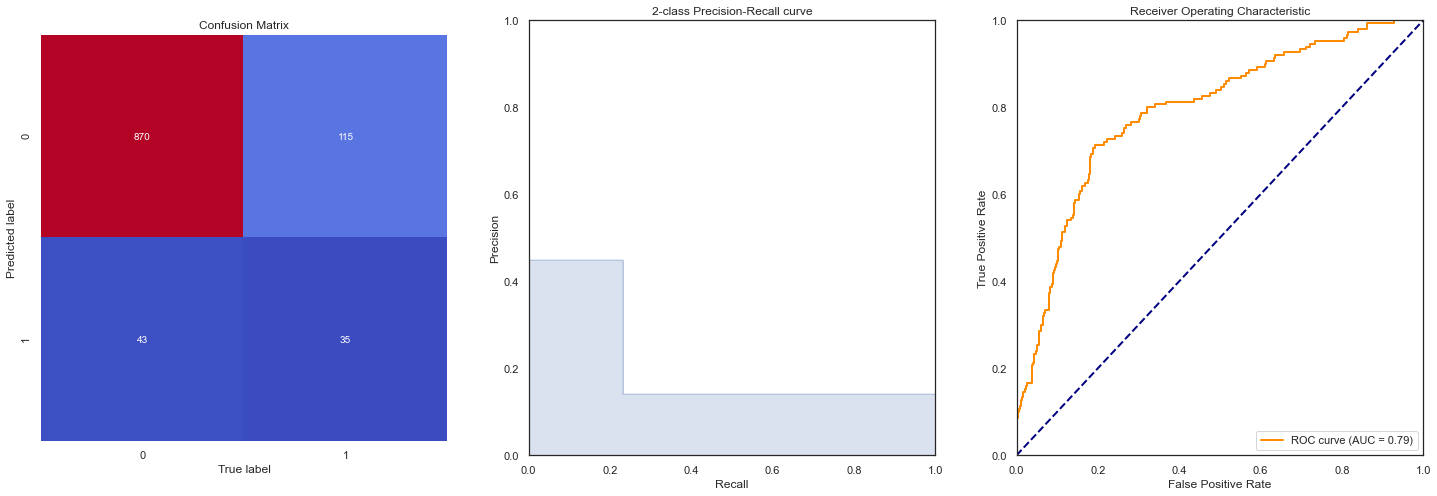


----------------------------
- LogisticRegression_SMOTE -
----------------------------
Accuracy : 0.7846 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3498 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6133 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7644                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


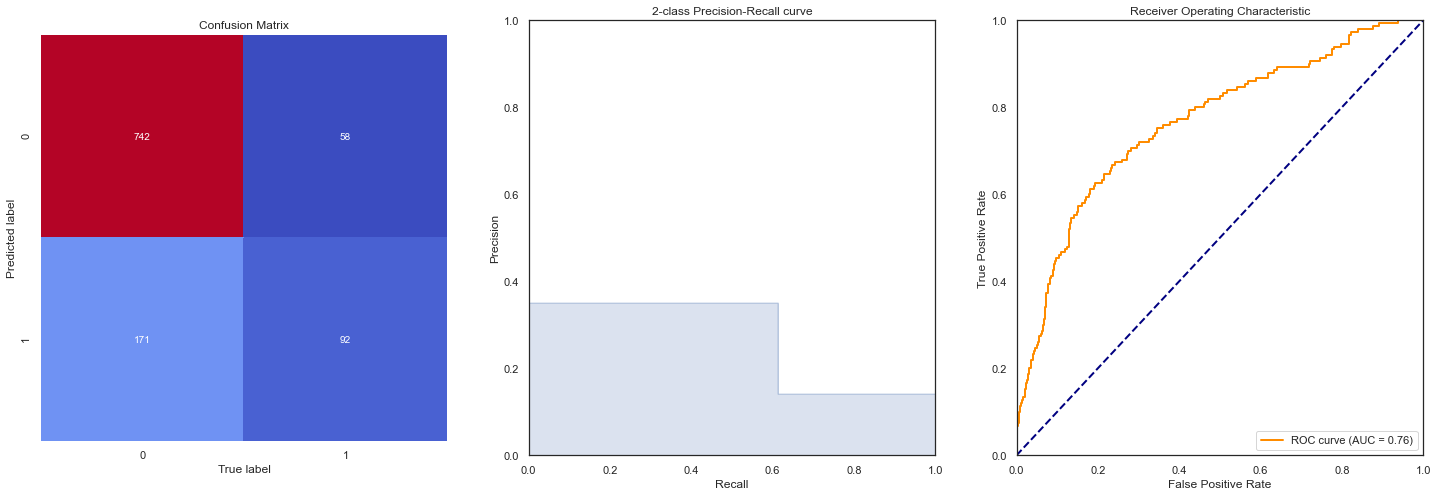


--------------
- GaussianNB -
--------------
Accuracy : 0.5569 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1931 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6733 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6325                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


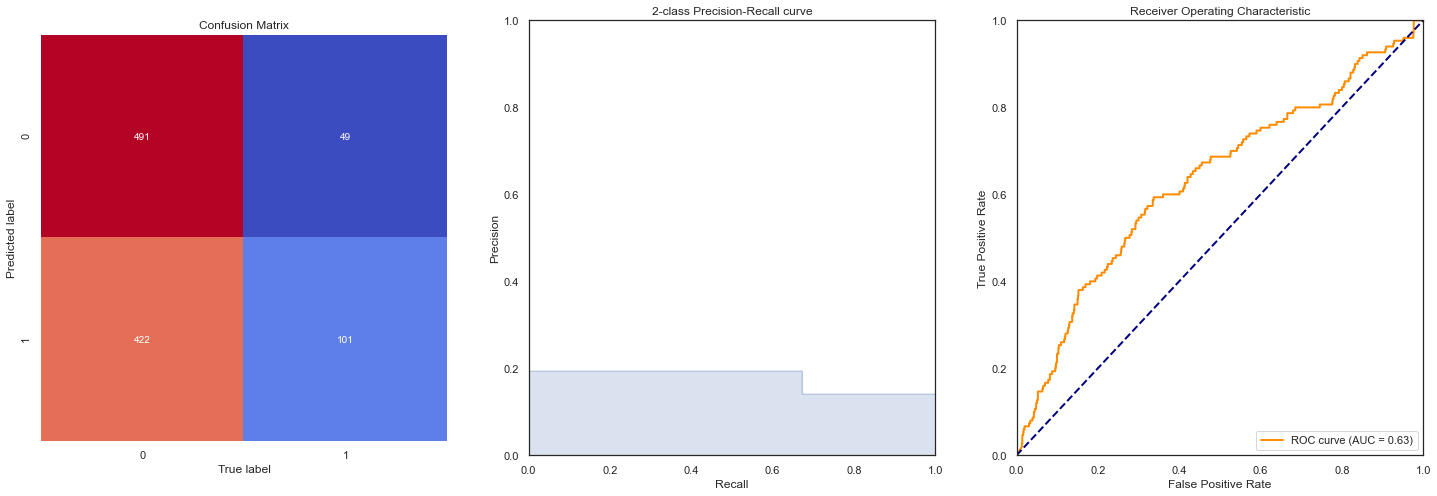


--------------------
- GaussianNB_SMOTE -
--------------------
Accuracy : 0.4807 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1758 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7267 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5987                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


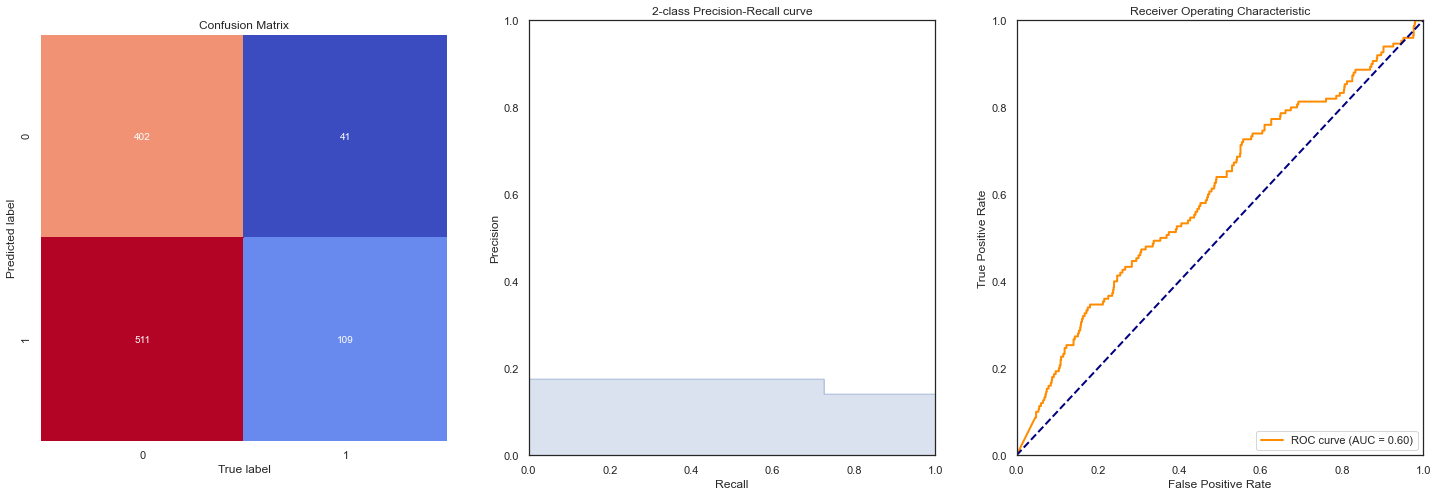


--------------------------
- DecisionTreeClassifier -
--------------------------
Accuracy : 0.9012 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6433 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6733 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8060                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


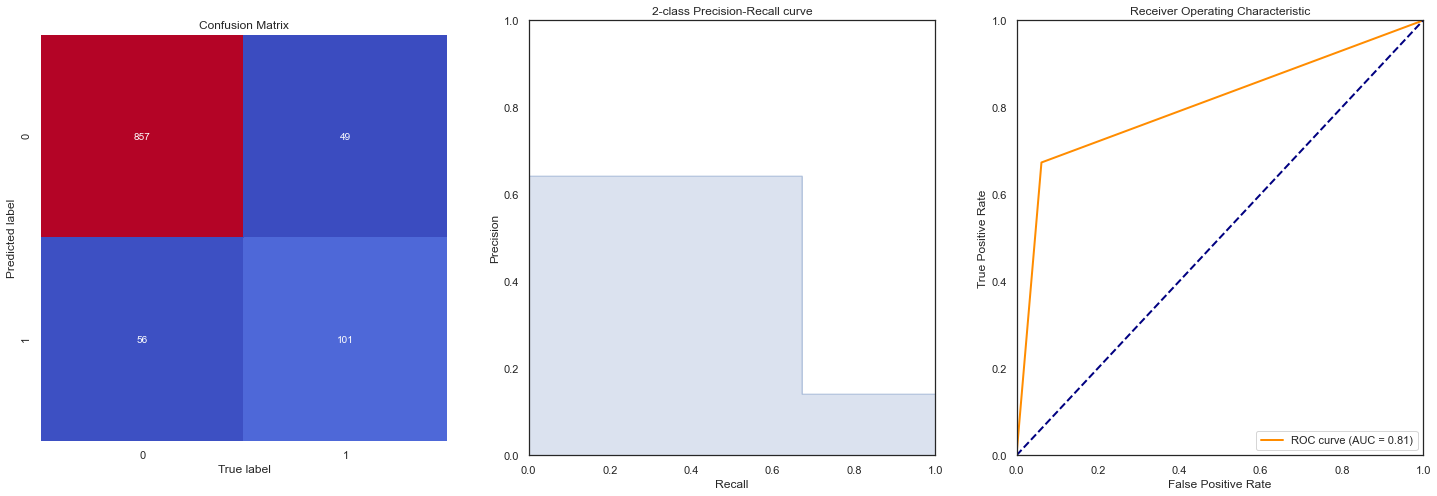


--------------------------------
- DecisionTreeClassifier_SMOTE -
--------------------------------
Accuracy : 0.8692 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5266 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7267 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8097                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


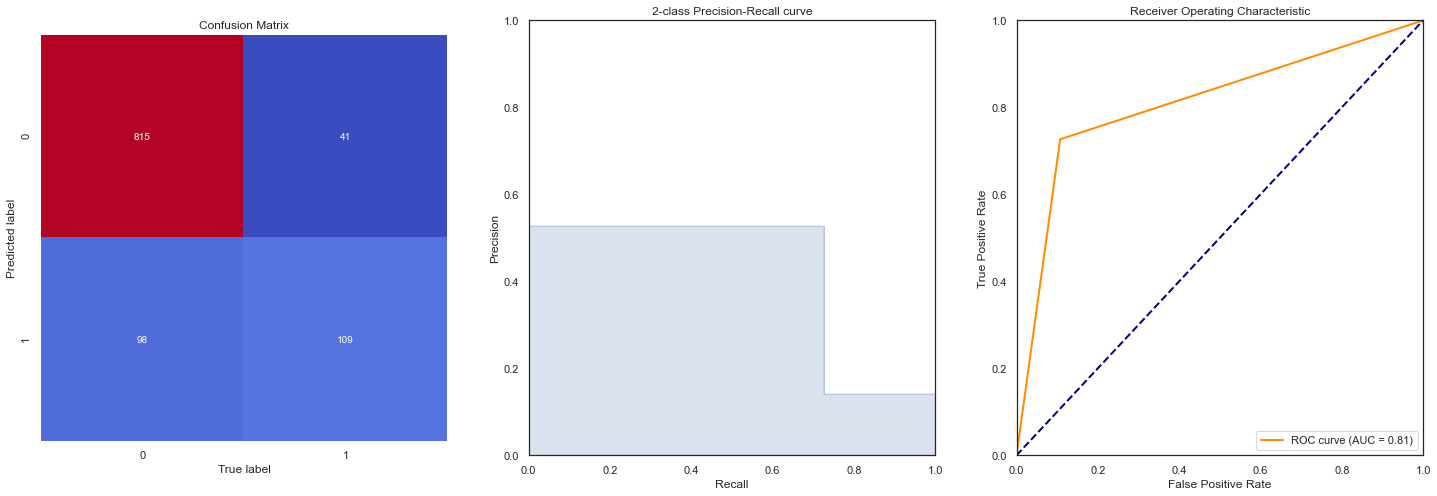


--------------------------
- RandomForestClassifier -
--------------------------
Accuracy : 0.9483 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9126                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


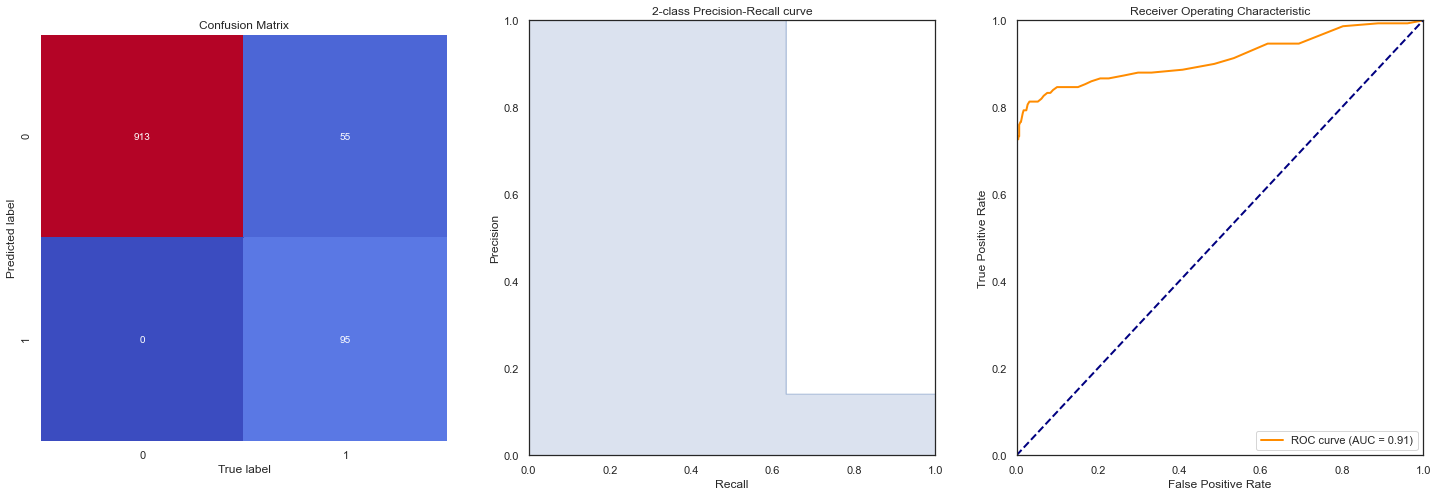


--------------------------------
- RandomForestClassifier_SMOTE -
--------------------------------
Accuracy : 0.9398 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7986 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9094                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


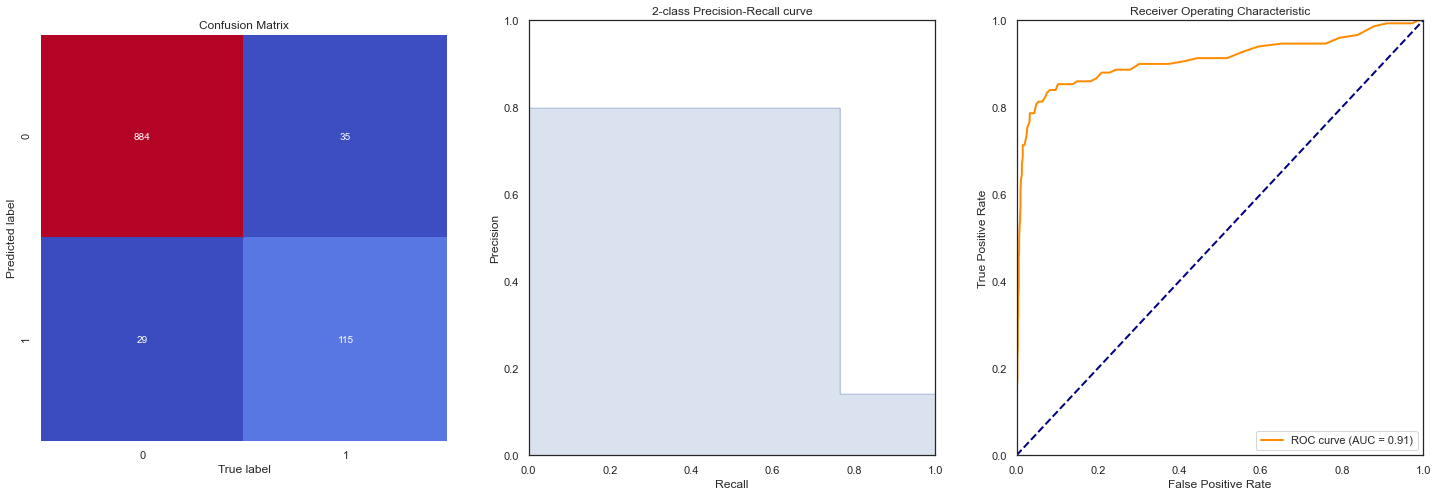


----------------------
- AdaBoostClassifier -
----------------------
Accuracy : 0.8843 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6517 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3867 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8480                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


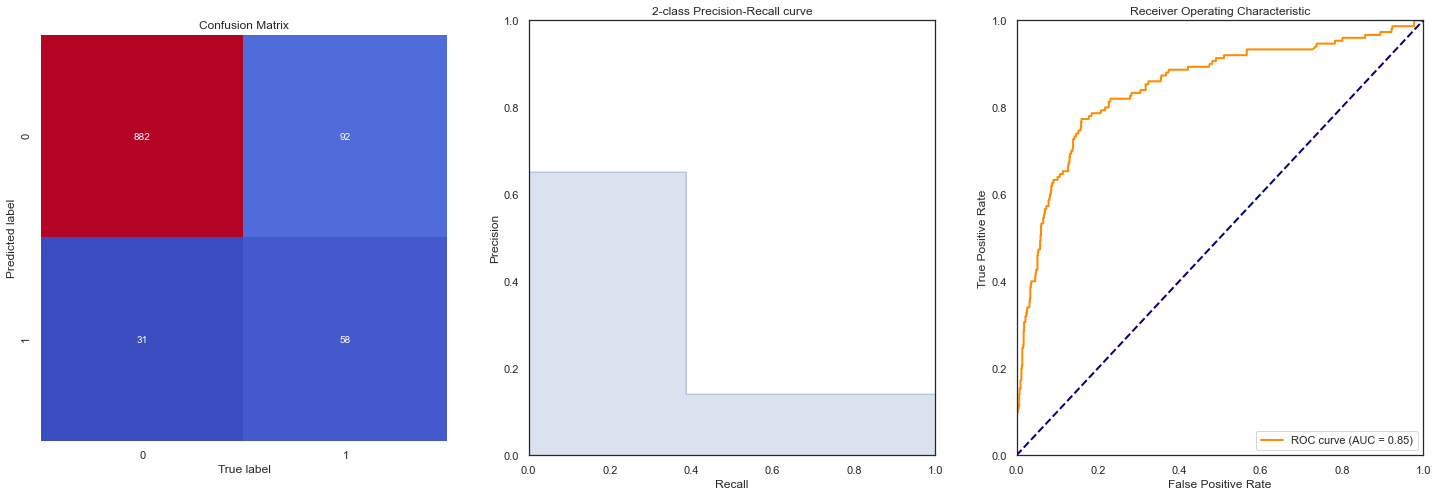


----------------------------
- AdaBoostClassifier_SMOTE -
----------------------------
Accuracy : 0.8504 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4774 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8306                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


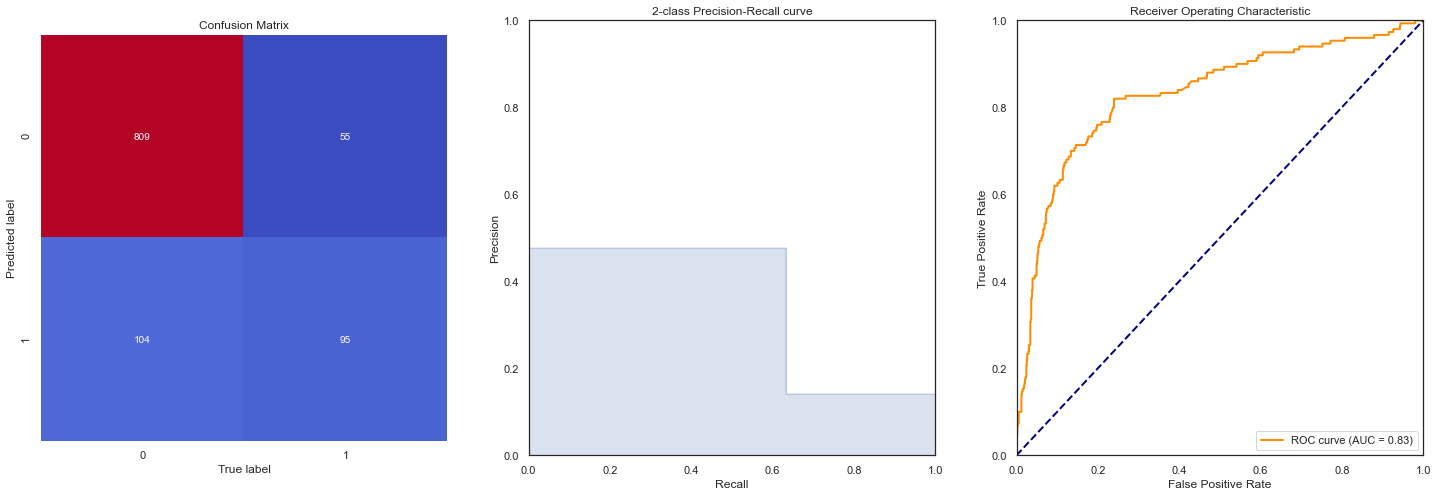


-----------------
- XGBClassifier -
-----------------
Accuracy : 0.9567 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9194 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7600 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9187                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


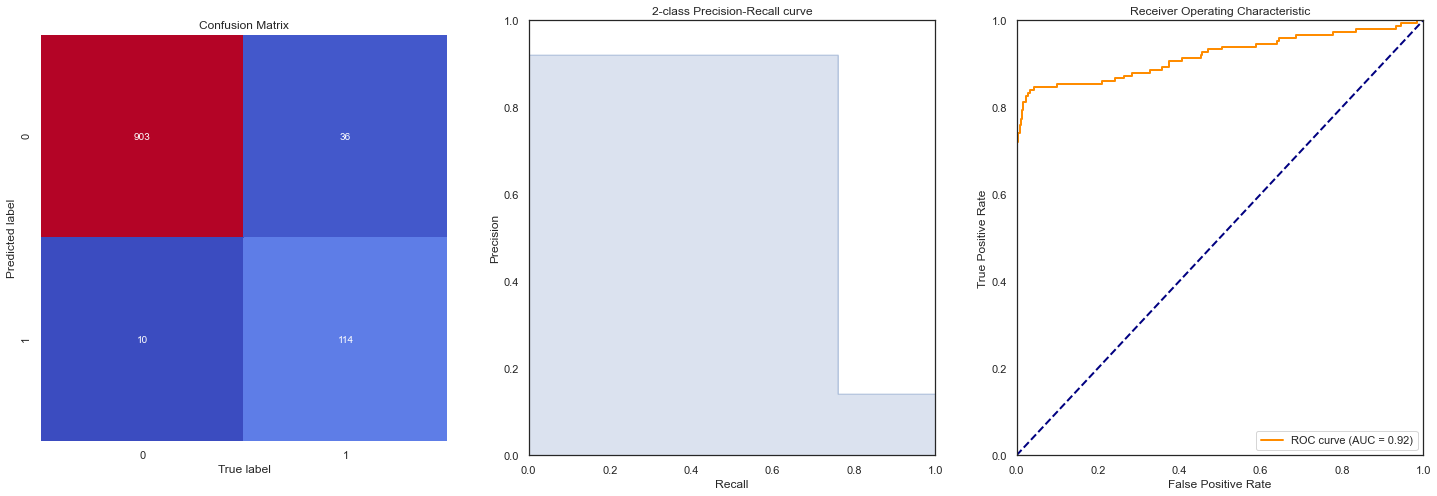


-----------------------
- XGBClassifier_SMOTE -
-----------------------
Accuracy : 0.9567 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8939 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7867 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9253                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


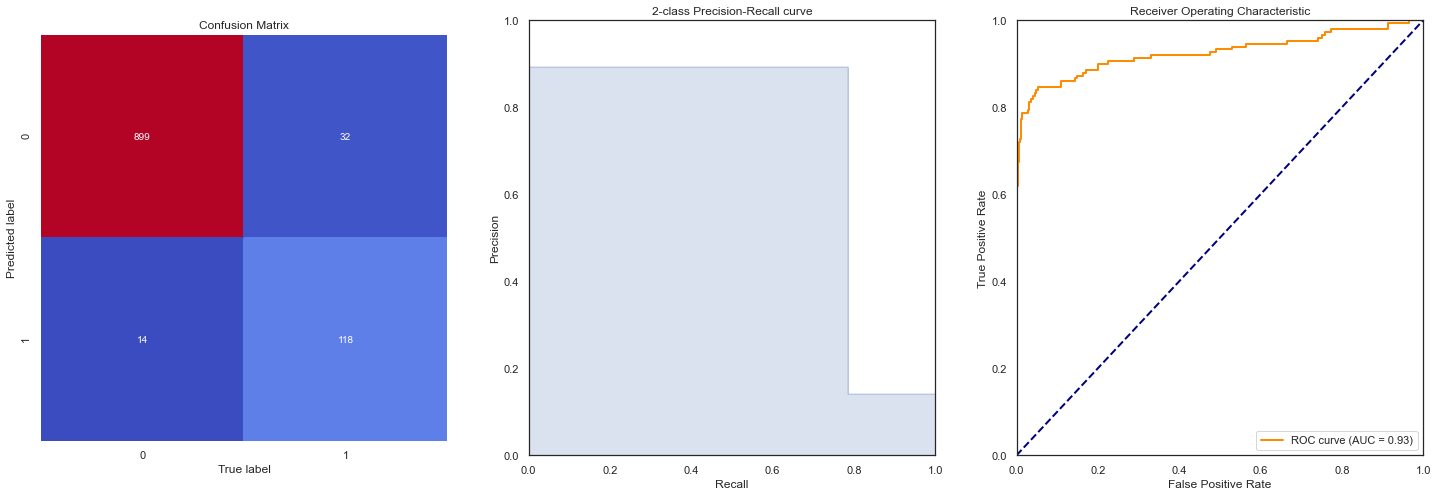


-------------------------
- XGBClassifier_GSearch -
-------------------------
Accuracy : 0.9614 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9504 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9124                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


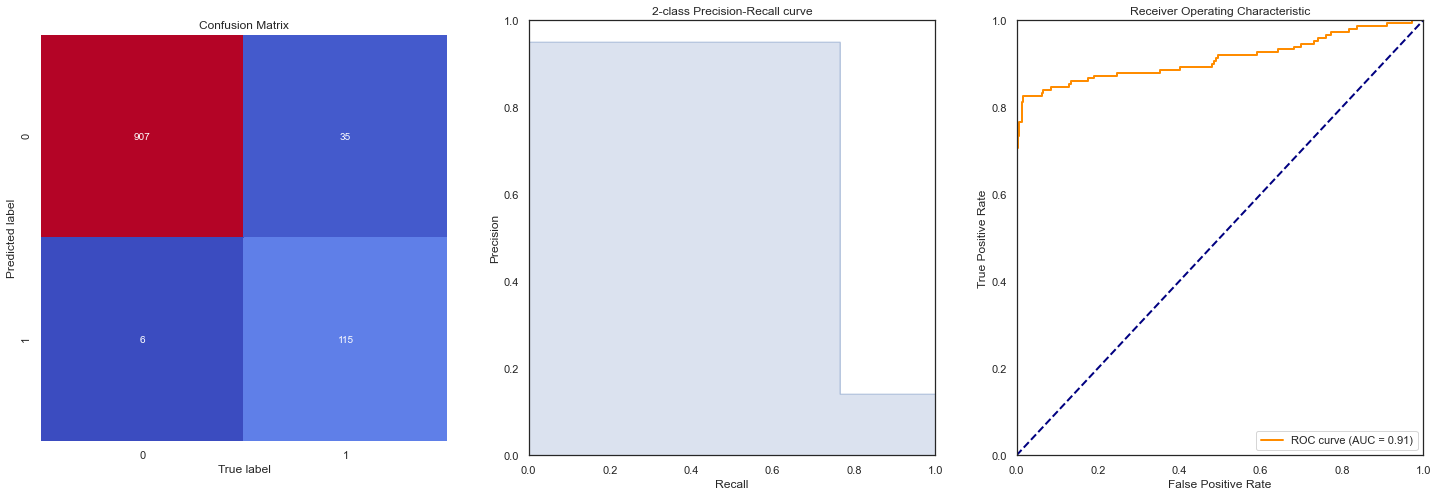


-------------------------------
- XGBClassifier_GSearch_SMOTE -
-------------------------------
Accuracy : 0.9577 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9268 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7600 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9109                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


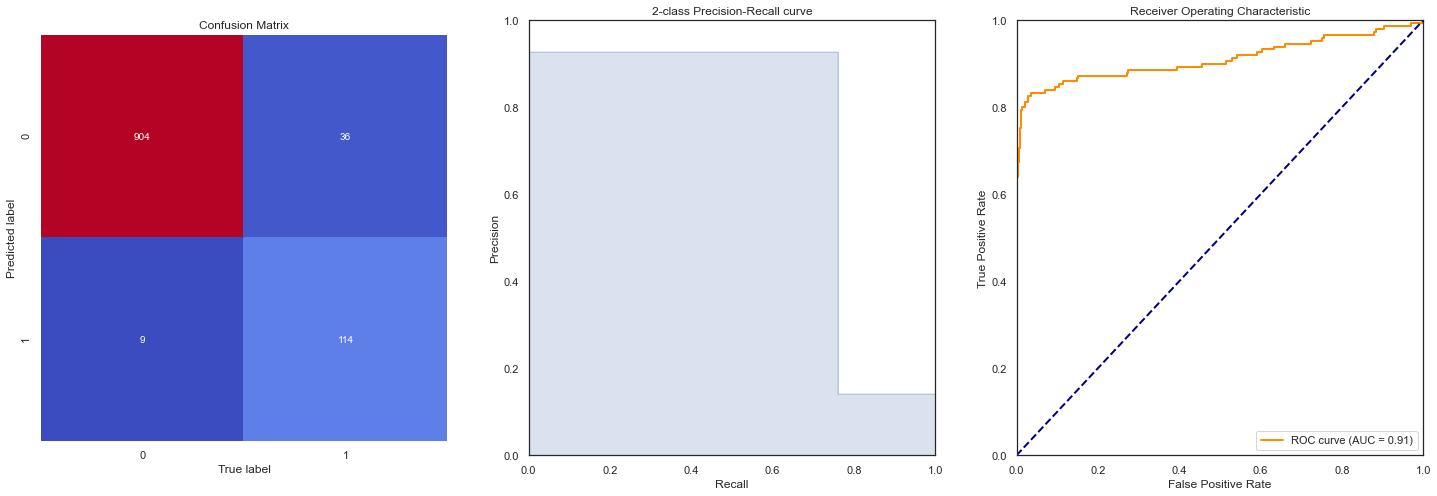


---------------------
- XGBClassifier_Opt -
---------------------
Accuracy : 0.9595 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9280 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7733 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9115                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


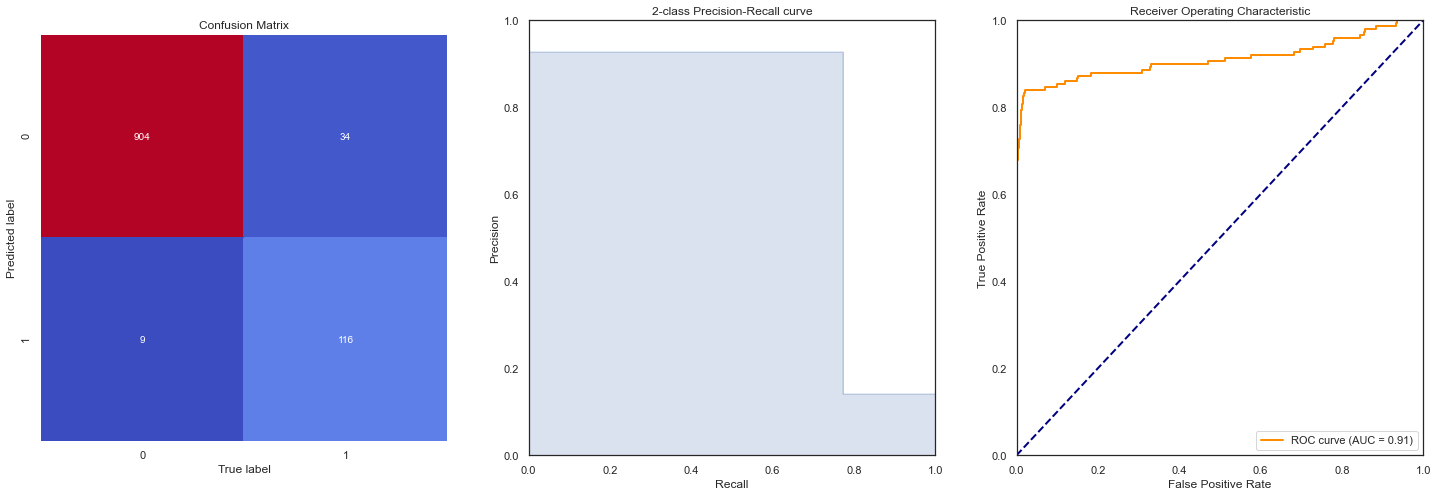


---------------------------
- XGBClassifier_Opt_SMOTE -
---------------------------
Accuracy : 0.9539 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8686 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7933 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9211                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


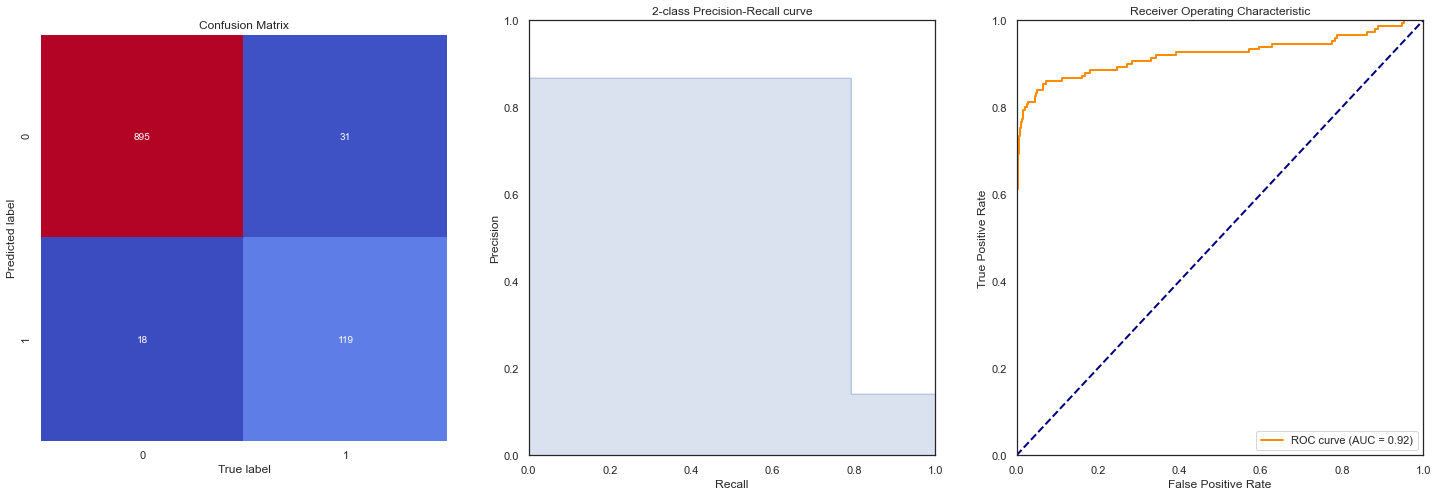


------------------------------
- RandomForestClassifier_Opt -
------------------------------
Accuracy : 0.9511 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9900 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6600 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9105                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


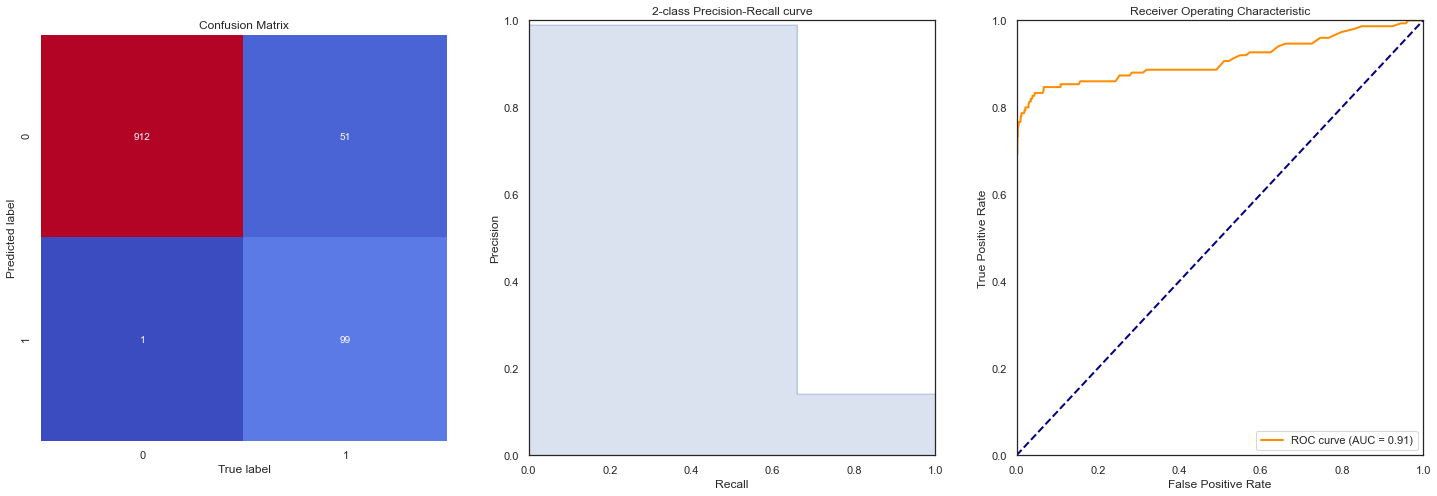


------------------------------------
- RandomForestClassifier_Opt_SMOTE -
------------------------------------
Accuracy : 0.9483 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8369 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7867 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9168                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


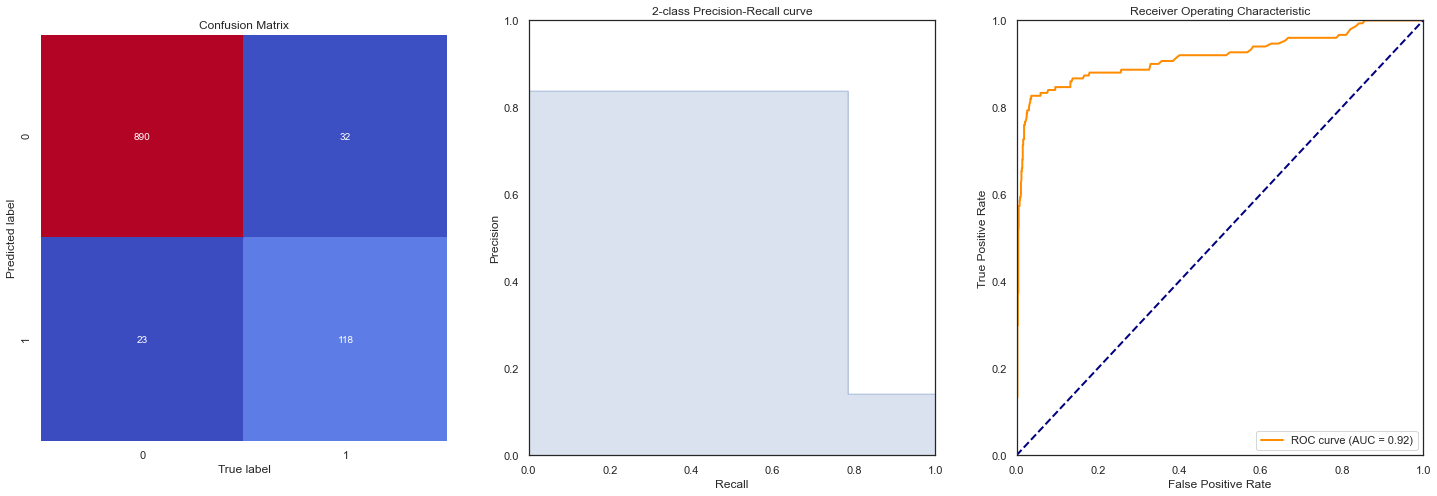


--------------
- Cat_model1 -
--------------
Accuracy : 0.9614 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9658 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7533 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9158                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


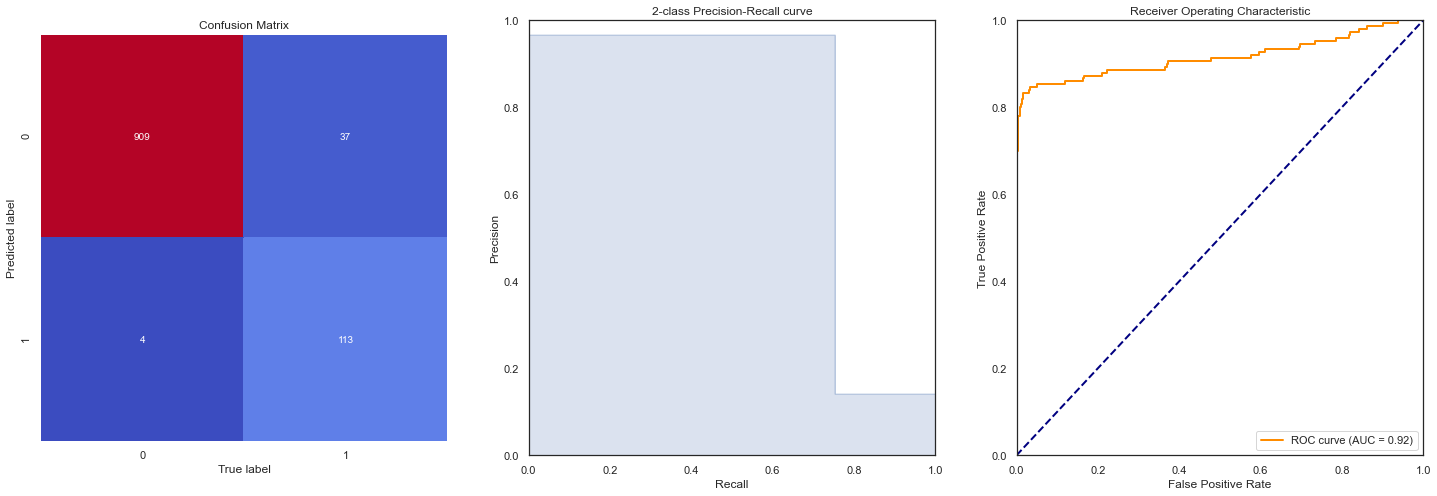


--------------------
- Cat_model1_SMOTE -
--------------------
Accuracy : 0.9558 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8992 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7733 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9239                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


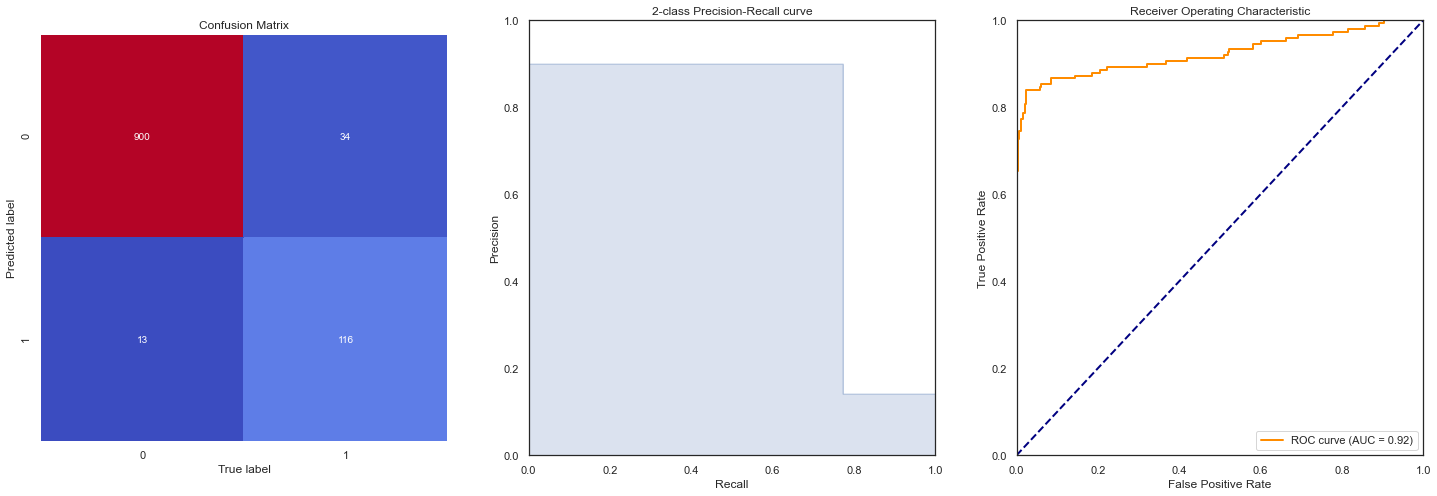


--------------
- CBC_Gridcv -
--------------
Accuracy : 0.9530 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9464 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7067 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9199                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


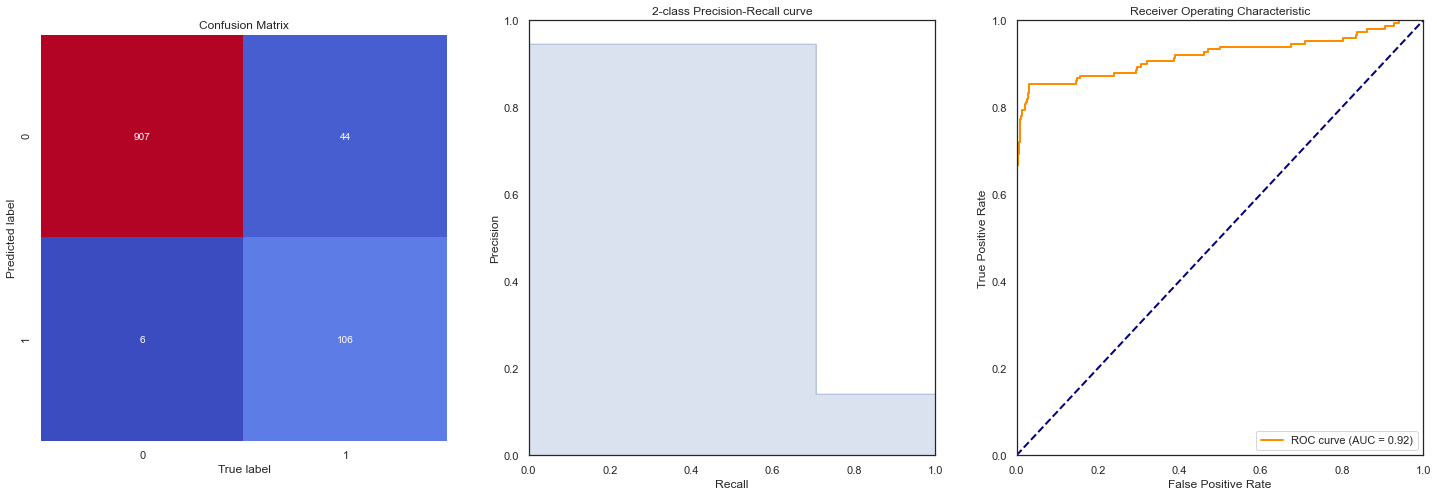


--------------------
- CBC_Gridcv_Smote -
--------------------
Accuracy : 0.9548 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9048 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7600 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9214                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


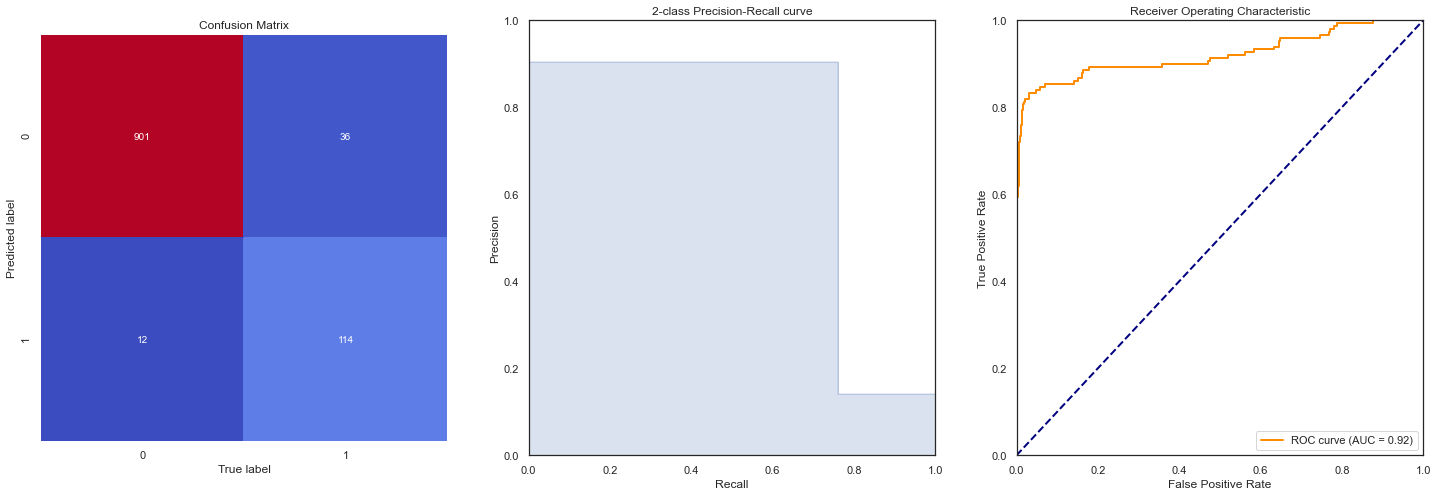


---------
- Keras -
---------


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [116]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['SVM','SVM_SMOTE','LogisticRegression','LogisticRegression_SMOTE','GaussianNB','GaussianNB_SMOTE',
          'DecisionTreeClassifier','DecisionTreeClassifier_SMOTE','RandomForestClassifier',
          'RandomForestClassifier_SMOTE',
          'AdaBoostClassifier','AdaBoostClassifier_SMOTE','XGBClassifier','XGBClassifier_SMOTE',
          'XGBClassifier_GSearch',
          'XGBClassifier_GSearch_SMOTE','XGBClassifier_Opt','XGBClassifier_Opt_SMOTE',
          'RandomForestClassifier_Opt','RandomForestClassifier_Opt_SMOTE','Cat_model1','Cat_model1_SMOTE',
          'CBC_Gridcv','CBC_Gridcv_Smote','Keras','Keras_SMOTE']

for i, m in enumerate([SVM,SVM_SMOTE,logmodel,logmodel_SMOTE,Gaussian,Gaussian_SMOTE,dt,dt_SMOTE,RFC,RFC_SMOTE,
                       ADA,ADA_SMOTE,gbm,gbm_SMOTE,xgb_grid,xgb_grid_SMOTE,gbm_optuna,
                       gbm_optuna_SMOTE,RFC_opt,RFC_opt_SMOTE,Cat_model1,Cat_model1_SMOTE,CBC_Gridcv,CBC_Gridcv_Smote,
                       keras,keras_Smote]):
    print('-' * (len(models[i]) + 4))
    print('- %s -' % models[i])
    print('-'*(len(models[i]) + 4))
    predictions = m.predict(X_test)
    probabilities = m.predict_proba(X_test)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
  
    print()    

In [117]:
results


Model  Accuracy  Precision    Recall   ROC_AUC
0                                SVM  0.858890   0.000000  0.000000  0.778744
1                          SVM_SMOTE  0.784572   0.356364  0.653333  0.773888
2                 LogisticRegression  0.851364   0.448718  0.233333  0.792019
3           LogisticRegression_SMOTE  0.784572   0.349810  0.613333  0.764432
4                         GaussianNB  0.556914   0.193117  0.673333  0.632516
5                   GaussianNB_SMOTE  0.480715   0.175806  0.726667  0.598715
6             DecisionTreeClassifier  0.901223   0.643312  0.673333  0.805999
7       DecisionTreeClassifier_SMOTE  0.869238   0.526570  0.726667  0.809664
8             RandomForestClassifier  0.948260   1.000000  0.633333  0.912643
9       RandomForestClassifier_SMOTE  0.939793   0.798611  0.766667  0.909423
10                AdaBoostClassifier  0.884290   0.651685  0.386667  0.847981
11          AdaBoostClassifier_SMOTE  0.850423   0.477387  0.633333  0.830573
12                     XGBClassifier  0.956726   0.919355  0.760000  0.918722
13               XGBClassifier_SMOTE  0.956726   0.893939  0.786667  0.925287
14             XGBClassifier_GSearch  0.961430   0.950413  0.766667  0.912399
15       XGBClassifier_GSearch_SMOTE  0.957667   0.926829  0.760000  0.910851
16                 XGBClassifier_Opt  0.959548   0.928000  0.773333  0.911486
17           XGBClassifier_Opt_SMOTE  0.953904   0.868613  0.793333  0.921081
18        RandomForestClassifier_Opt  0.951082   0.990000  0.660000  0.910453
19  RandomForestClassifier_Opt_SMOTE  0.948260   0.836879  0.786667  0.916780
20                        Cat_model1  0.961430   0.965812  0.753333  0.915831
21                  Cat_model1_SMOTE  0.955786   0.899225  0.773333  0.923899
22                        CBC_Gridcv  0.952963   0.946429  0.706667  0.919883
23                  CBC_Gridcv_Smote  0.954845   0.904762  0.760000  0.921417

In [118]:
results.sort_values(by=['Accuracy', 'Precision', 'Recall', 'ROC_AUC'], axis=0, ascending=False, inplace=False,kind='quicksort')


Model  Accuracy  Precision    Recall   ROC_AUC
20                        Cat_model1  0.961430   0.965812  0.753333  0.915831
14             XGBClassifier_GSearch  0.961430   0.950413  0.766667  0.912399
16                 XGBClassifier_Opt  0.959548   0.928000  0.773333  0.911486
15       XGBClassifier_GSearch_SMOTE  0.957667   0.926829  0.760000  0.910851
12                     XGBClassifier  0.956726   0.919355  0.760000  0.918722
13               XGBClassifier_SMOTE  0.956726   0.893939  0.786667  0.925287
21                  Cat_model1_SMOTE  0.955786   0.899225  0.773333  0.923899
23                  CBC_Gridcv_Smote  0.954845   0.904762  0.760000  0.921417
17           XGBClassifier_Opt_SMOTE  0.953904   0.868613  0.793333  0.921081
22                        CBC_Gridcv  0.952963   0.946429  0.706667  0.919883
18        RandomForestClassifier_Opt  0.951082   0.990000  0.660000  0.910453
8             RandomForestClassifier  0.948260   1.000000  0.633333  0.912643
19  RandomForestClassifier_Opt_SMOTE  0.948260   0.836879  0.786667  0.916780
9       RandomForestClassifier_SMOTE  0.939793   0.798611  0.766667  0.909423
6             DecisionTreeClassifier  0.901223   0.643312  0.673333  0.805999
10                AdaBoostClassifier  0.884290   0.651685  0.386667  0.847981
7       DecisionTreeClassifier_SMOTE  0.869238   0.526570  0.726667  0.809664
0                                SVM  0.858890   0.000000  0.000000  0.778744
2                 LogisticRegression  0.851364   0.448718  0.233333  0.792019
11          AdaBoostClassifier_SMOTE  0.850423   0.477387  0.633333  0.830573
1                          SVM_SMOTE  0.784572   0.356364  0.653333  0.773888
3           LogisticRegression_SMOTE  0.784572   0.349810  0.613333  0.764432
4                         GaussianNB  0.556914   0.193117  0.673333  0.632516
5                   GaussianNB_SMOTE  0.480715   0.175806  0.726667  0.598715

## Comparision of all the models with its best accuracy scores

In [119]:
import plotly.graph_objects as go

x = results['Model']
y = results['Accuracy']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='XGBoost,RandomForrest & Catboost accuracy scores ranges from 95% - 96%')
fig.show()

## Recall Scores Comparision

In [120]:
import plotly.graph_objects as go

x = results['Model']
y = results['Recall']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text=' XGBoost & RandomForest gives the highest of 79 %  recall scores')
fig.show()

##  ROC - AUC Scores 

In [121]:
import plotly.graph_objects as go

x = results['Model']
y = results['ROC_AUC']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='XGBoost gives the highest of 92% ROC_AUC Score')
fig.show()

## Conclusion
### The final model for the deployment for 'Customer Churn Prediction' would be XGBoost model(XGBClassifier_Opt_SMOTE) the highest performance model interms of  its accuracy score, recall score,precision score and roc-auc score.